# **Problem Statement**
The objective is to build a machine learning model that predicts customer churn,helping the telecom company identify which customers are likely to leave, so they can take early action to improve retention.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install pandas sqlalchemy pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pymysql
# Connection
conn = pymysql.connect(
    database="project_telecom",
    host="18.136.157.135",
    user="dm_team3",
    password="DM!$!Team!27@9!20&"
)
# Load the data
query = "SELECT * FROM telecom_churn_data;"
df = pd.read_sql(query, conn)
# Rename columns
df.columns = [
    'State', 'Account Length', 'Area Code', 'Phone',
    'International Plan', 'VMail Plan', 'VMail Message',
    'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge',
    'Night Mins', 'Night Calls', 'Night Charge',
    'International Mins', 'International Calls', 'International Charge',
    'CustServ Calls', 'Churn'
]


# Preview the data
print(df.head())
conn.close()

  State Account Length Area Code      Phone International Plan VMail Plan  \
0    KS            128       415   382-4657                 no        yes   
1    OH            107       415   371-7191                 no        yes   
2    NJ            137       415   358-1921                 no         no   
3    OH             84       408   375-9999                yes         no   
4    OK             75       415   330-6626                yes         no   

  VMail Message Day Mins Day Calls Day Charge  ... Eve Calls Eve Charge  \
0            25    265.1       110      45.07  ...        99      16.78   
1            26    161.6       123      27.47  ...       103      16.62   
2             0    243.4       114      41.38  ...       110       10.3   
3             0    299.4        71       50.9  ...        88       5.26   
4             0    166.7       113      28.34  ...       122      12.61   

  Night Mins Night Calls Night Charge International Mins International Calls  \
0     

In [ ]:
df.head(pd.set_option('display.max_columns',None))

State Account Length Area Code      Phone International Plan VMail Plan  \
0       KS            128       415   382-4657                 no        yes   
1       OH            107       415   371-7191                 no        yes   
2       NJ            137       415   358-1921                 no         no   
3       OH             84       408   375-9999                yes         no   
4       OK             75       415   330-6626                yes         no   
...    ...            ...       ...        ...                ...        ...   
4612    NY             57       510   345-7512                 no        yes   
4613    NM            177       408   343-6820                 no        yes   
4614    VT             67       408   338-4794                 no        yes   
4615    MI             98       415   355-8388                 no        yes   
4616    IN            140       415   409-6884                 no         no   

     VMail Message Day Mins Day Calls Day Charge Eve Mins Eve Calls  \
0               25    265.1       110      45.07    197.4        99   
1               26    161.6       123      27.47    195.5       103   
2                0    243.4       114      41.38    121.2       110   
3                0    299.4        71       50.9     61.9        88   
4                0    166.7       113      28.34    148.3       122   
...            ...      ...       ...        ...      ...       ...   
4612            25      144        81      24.48    187.2       112   
4613            29      189        91      32.13    303.1        96   
4614            33    127.5       126      21.68    296.1       129   
4615            23    168.9        98      28.71    226.3       117   
4616             0    204.7       100       34.8    126.8       107   

     Eve Charge Night Mins Night Calls Night Charge International Mins  \
0         16.78      244.7          91        11.01                 10   
1         16.62      254.4         103        11.45               13.7   
2          10.3      162.6         104         7.32               12.2   
3          5.26      196.9          89         8.86                6.6   
4         12.61      186.9         121         8.41               10.1   
...         ...        ...         ...          ...                ...   
4612      15.91      158.6         122         7.14                8.5   
4613      25.76      163.6         116         7.36               15.7   
4614      25.17      200.9          91         9.04                 13   
4615      19.24      165.5          96         7.45               14.3   
4616      10.78      202.8         115         9.13               12.1   

     International Calls International Charge CustServ Calls    Churn  
0                      3                  2.7              1   False.  
1                      3                  3.7              1   False.  
2                      5                 3.29              0   False.  
3                      7                 1.78              2   False.  
4                      3                 2.73              3   False.  
...                  ...                  ...            ...      ...  
4612                   6                  2.3              3   False.  
4613                   1                 4.24              3   False.  
4614                   3                 3.51              1   False.  
4615                   3                 3.86              0   False.  
4616                   4                 3.27              2   False.  

[4617 rows x 21 columns]

In [ ]:
data=df.copy()

In [ ]:
data.drop(columns=['State','Phone'],axis=1,inplace=True)

In [ ]:
data

Account Length Area Code International Plan VMail Plan VMail Message  \
0               128       415                 no        yes            25   
1               107       415                 no        yes            26   
2               137       415                 no         no             0   
3                84       408                yes         no             0   
4                75       415                yes         no             0   
...             ...       ...                ...        ...           ...   
4612             57       510                 no        yes            25   
4613            177       408                 no        yes            29   
4614             67       408                 no        yes            33   
4615             98       415                 no        yes            23   
4616            140       415                 no         no             0   

     Day Mins Day Calls Day Charge Eve Mins Eve Calls Eve Charge Night Mins  \
0       265.1       110      45.07    197.4        99      16.78      244.7   
1       161.6       123      27.47    195.5       103      16.62      254.4   
2       243.4       114      41.38    121.2       110       10.3      162.6   
3       299.4        71       50.9     61.9        88       5.26      196.9   
4       166.7       113      28.34    148.3       122      12.61      186.9   
...       ...       ...        ...      ...       ...        ...        ...   
4612      144        81      24.48    187.2       112      15.91      158.6   
4613      189        91      32.13    303.1        96      25.76      163.6   
4614    127.5       126      21.68    296.1       129      25.17      200.9   
4615    168.9        98      28.71    226.3       117      19.24      165.5   
4616    204.7       100       34.8    126.8       107      10.78      202.8   

     Night Calls Night Charge International Mins International Calls  \
0             91        11.01                 10                   3   
1            103        11.45               13.7                   3   
2            104         7.32               12.2                   5   
3             89         8.86                6.6                   7   
4            121         8.41               10.1                   3   
...          ...          ...                ...                 ...   
4612         122         7.14                8.5                   6   
4613         116         7.36               15.7                   1   
4614          91         9.04                 13                   3   
4615          96         7.45               14.3                   3   
4616         115         9.13               12.1                   4   

     International Charge CustServ Calls    Churn  
0                     2.7              1   False.  
1                     3.7              1   False.  
2                    3.29              0   False.  
3                    1.78              2   False.  
4                    2.73              3   False.  
...                   ...            ...      ...  
4612                  2.3              3   False.  
4613                 4.24              3   False.  
4614                 3.51              1   False.  
4615                 3.86              0   False.  
4616                 3.27              2   False.  

[4617 rows x 19 columns]

#Domain Analysis

No-Churn Telecom, a European telecom provider, is experiencing a high customer churn rate of over 10% despite offering competitive pricing and attractive service packages.

In the telecom industry, customer switching is common due to low switching costs and abundant alternatives, making customer retention a critical focus area.

The business objective is to use machine learning to predict which customers are at risk of leaving and to assign each a Churn Risk Score along with a CHURN_FLAG (1 = likely to churn, 0 = likely to stay).

This prediction will support targeted retention efforts such as proactive offers, personalized plans, or improved customer service for high-risk customers.

The available dataset contains 4,617 records retrieved from a SQL database, representing individual customer profiles and activity.

Data includes fields such as account length, international plan status, voicemail plan, usage patterns (day/evening/night/international calls and charges), and frequency of customer service interactions.

The final target variable is Churn, which indicates whether a customer has left the service.

The aim is to build a model that identifies churn patterns, enabling the business to intervene early, reduce churn, and increase overall customer lifetime value and revenue stability.

#Basic Checks

In [ ]:
data.shape

(4617, 19)

In [ ]:
data.head()

Account Length Area Code International Plan VMail Plan VMail Message  \
0            128       415                 no        yes            25   
1            107       415                 no        yes            26   
2            137       415                 no         no             0   
3             84       408                yes         no             0   
4             75       415                yes         no             0   

  Day Mins Day Calls Day Charge Eve Mins Eve Calls Eve Charge Night Mins  \
0    265.1       110      45.07    197.4        99      16.78      244.7   
1    161.6       123      27.47    195.5       103      16.62      254.4   
2    243.4       114      41.38    121.2       110       10.3      162.6   
3    299.4        71       50.9     61.9        88       5.26      196.9   
4    166.7       113      28.34    148.3       122      12.61      186.9   

  Night Calls Night Charge International Mins International Calls  \
0          91        11.01                 10                   3   
1         103        11.45               13.7                   3   
2         104         7.32               12.2                   5   
3          89         8.86                6.6                   7   
4         121         8.41               10.1                   3   

  International Charge CustServ Calls    Churn  
0                  2.7              1   False.  
1                  3.7              1   False.  
2                 3.29              0   False.  
3                 1.78              2   False.  
4                 2.73              3   False.

In [ ]:
data.tail()

Account Length Area Code International Plan VMail Plan VMail Message  \
4612             57       510                 no        yes            25   
4613            177       408                 no        yes            29   
4614             67       408                 no        yes            33   
4615             98       415                 no        yes            23   
4616            140       415                 no         no             0   

     Day Mins Day Calls Day Charge Eve Mins Eve Calls Eve Charge Night Mins  \
4612      144        81      24.48    187.2       112      15.91      158.6   
4613      189        91      32.13    303.1        96      25.76      163.6   
4614    127.5       126      21.68    296.1       129      25.17      200.9   
4615    168.9        98      28.71    226.3       117      19.24      165.5   
4616    204.7       100       34.8    126.8       107      10.78      202.8   

     Night Calls Night Charge International Mins International Calls  \
4612         122         7.14                8.5                   6   
4613         116         7.36               15.7                   1   
4614          91         9.04                 13                   3   
4615          96         7.45               14.3                   3   
4616         115         9.13               12.1                   4   

     International Charge CustServ Calls    Churn  
4612                  2.3              3   False.  
4613                 4.24              3   False.  
4614                 3.51              1   False.  
4615                 3.86              0   False.  
4616                 3.27              2   False.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Account Length        4617 non-null   object
 1   Area Code             4617 non-null   object
 2   International Plan    4617 non-null   object
 3   VMail Plan            4617 non-null   object
 4   VMail Message         4617 non-null   object
 5   Day Mins              4617 non-null   object
 6   Day Calls             4617 non-null   object
 7   Day Charge            4617 non-null   object
 8   Eve Mins              4617 non-null   object
 9   Eve Calls             4617 non-null   object
 10  Eve Charge            4617 non-null   object
 11  Night Mins            4617 non-null   object
 12  Night Calls           4617 non-null   object
 13  Night Charge          4617 non-null   object
 14  International Mins    4617 non-null   object
 15  International Calls   4617 non-null   

In [ ]:
data.dtypes

Account Length          object
Area Code               object
International Plan      object
VMail Plan              object
VMail Message           object
Day Mins                object
Day Calls               object
Day Charge              object
Eve Mins                object
Eve Calls               object
Eve Charge              object
Night Mins              object
Night Calls             object
Night Charge            object
International Mins      object
International Calls     object
International Charge    object
CustServ Calls          object
Churn                   object
dtype: object

In [ ]:
#  Strip any whitespace from headers and values
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#  Convert the specific columns to numeric, coercing errors to NaN
# Define columns that should remain categorical
categorical_cols = ['International Plan', 'VMail Plan', 'Churn']
# Convert all other columns to numeric
for col in data.columns:
    if col not in categorical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce') # If it contains non-numeric values (like text, symbols, or mixed types), it gets replaced with NaN (errors='coerce').
# Check again
print(data.dtypes)

Account Length            int64
Area Code                 int64
International Plan       object
VMail Plan               object
VMail Message             int64
Day Mins                float64
Day Calls                 int64
Day Charge              float64
Eve Mins                float64
Eve Calls                 int64
Eve Charge              float64
Night Mins              float64
Night Calls               int64
Night Charge            float64
International Mins      float64
International Calls       int64
International Charge    float64
CustServ Calls            int64
Churn                    object
dtype: object


In [ ]:
data.describe().T

count        mean        std     min     25%     50%  \
Account Length        4617.0  100.645224  39.597194    1.00   74.00  100.00   
Area Code             4617.0  437.046350  42.288212  408.00  408.00  415.00   
VMail Message         4617.0    7.849903  13.592333    0.00    0.00    0.00   
Day Mins              4617.0  180.447152  53.983540    0.00  143.70  180.00   
Day Calls             4617.0  100.054364  19.883027    0.00   87.00  100.00   
Day Charge            4617.0   30.676576   9.177145    0.00   24.43   30.60   
Eve Mins              4617.0  200.429088  50.557001    0.00  165.90  200.80   
Eve Calls             4617.0  100.179770  19.821314    0.00   87.00  101.00   
Eve Charge            4617.0   17.036703   4.297332    0.00   14.10   17.07   
Night Mins            4617.0  200.623933  50.543616   23.20  167.10  200.80   
Night Calls           4617.0   99.944120  19.935053   12.00   87.00  100.00   
Night Charge          4617.0    9.028185   2.274488    1.04    7.52    9.04   
International Mins    4617.0   10.279294   2.757361    0.00    8.60   10.30   
International Calls   4617.0    4.433831   2.457615    0.00    3.00    4.00   
International Charge  4617.0    2.775926   0.744413    0.00    2.32    2.78   
CustServ Calls        4617.0    1.567035   1.307019    0.00    1.00    1.00   

                         75%     max  
Account Length        127.00  243.00  
Area Code             510.00  510.00  
VMail Message          17.00   51.00  
Day Mins              216.80  351.50  
Day Calls             113.00  165.00  
Day Charge             36.86   59.76  
Eve Mins              234.00  363.70  
Eve Calls             114.00  170.00  
Eve Charge             19.89   30.91  
Night Mins            234.90  395.00  
Night Calls           113.00  175.00  
Night Charge           10.57   17.77  
International Mins     12.10   20.00  
International Calls     6.00   20.00  
International Charge    3.27    5.40  
CustServ Calls          2.00    9.00

In [ ]:
data.describe(include='O').T

count unique     top  freq
International Plan  4617      2      no  4171
VMail Plan          4617      2      no  3381
Churn               4617      2  False.  3961

In [ ]:
data.isnull().sum()

Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [ ]:
# To fetch numercial columns
num_col=data.select_dtypes(include=np.number).columns
num_col

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'International Mins',
       'International Calls', 'International Charge', 'CustServ Calls'],
      dtype='object')

In [ ]:
# To fetch categorical columns
cat_col=data.select_dtypes(include='object')
cat_col.columns

Index(['International Plan', 'VMail Plan', 'Churn'], dtype='object')

In [ ]:
#find unique categories in categorial columns using loop
for i in cat_col:
    print(i,data[i].unique())
    print(i,data[i].value_counts())
    print('*******************************************')

International Plan ['no' 'yes']
International Plan International Plan
no     4171
yes     446
Name: count, dtype: int64
*******************************************
VMail Plan ['yes' 'no']
VMail Plan VMail Plan
no     3381
yes    1236
Name: count, dtype: int64
*******************************************
Churn ['False.' 'True.']
Churn Churn
False.    3961
True.      656
Name: count, dtype: int64
*******************************************


In [ ]:
#find unique categories in categorial columns using loop
for i in num_col:

    print(i,data[i].value_counts())
    print('*******************************************')

Account Length Account Length
90     63
87     56
93     54
105    54
100    53
       ..
14      1
238     1
216     1
222     1
233     1
Name: count, Length: 218, dtype: int64
*******************************************
Area Code Area Code
415    2299
408    1161
510    1157
Name: count, dtype: int64
*******************************************
VMail Message VMail Message
0     3381
31      80
29      64
28      62
33      61
27      57
24      57
26      55
30      54
32      52
25      49
23      48
36      45
22      45
37      42
39      40
21      40
35      40
34      39
38      37
20      30
40      26
19      26
41      21
42      19
17      18
16      16
18      14
43      13
15      12
12      10
45      10
14       9
46       8
44       7
10       4
47       4
13       4
48       3
49       3
9        2
11       2
8        2
6        2
50       2
51       1
4        1
Name: count, dtype: int64
*******************************************
Day Mins Day Mins
154.0    10
189.3 

#EDA

#Bivariate Analysis

In [ ]:
data

Account Length  Area Code International Plan VMail Plan  VMail Message  \
0                128        415                 no        yes             25   
1                107        415                 no        yes             26   
2                137        415                 no         no              0   
3                 84        408                yes         no              0   
4                 75        415                yes         no              0   
...              ...        ...                ...        ...            ...   
4612              57        510                 no        yes             25   
4613             177        408                 no        yes             29   
4614              67        408                 no        yes             33   
4615              98        415                 no        yes             23   
4616             140        415                 no         no              0   

      Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0        265.1        110       45.07     197.4         99       16.78   
1        161.6        123       27.47     195.5        103       16.62   
2        243.4        114       41.38     121.2        110       10.30   
3        299.4         71       50.90      61.9         88        5.26   
4        166.7        113       28.34     148.3        122       12.61   
...        ...        ...         ...       ...        ...         ...   
4612     144.0         81       24.48     187.2        112       15.91   
4613     189.0         91       32.13     303.1         96       25.76   
4614     127.5        126       21.68     296.1        129       25.17   
4615     168.9         98       28.71     226.3        117       19.24   
4616     204.7        100       34.80     126.8        107       10.78   

      Night Mins  Night Calls  Night Charge  International Mins  \
0          244.7           91         11.01                10.0   
1          254.4          103         11.45                13.7   
2          162.6          104          7.32                12.2   
3          196.9           89          8.86                 6.6   
4          186.9          121          8.41                10.1   
...          ...          ...           ...                 ...   
4612       158.6          122          7.14                 8.5   
4613       163.6          116          7.36                15.7   
4614       200.9           91          9.04                13.0   
4615       165.5           96          7.45                14.3   
4616       202.8          115          9.13                12.1   

      International Calls  International Charge  CustServ Calls   Churn  
0                       3                  2.70               1  False.  
1                       3                  3.70               1  False.  
2                       5                  3.29               0  False.  
3                       7                  1.78               2  False.  
4                       3                  2.73               3  False.  
...                   ...                   ...             ...     ...  
4612                    6                  2.30               3  False.  
4613                    1                  4.24               3  False.  
4614                    3                  3.51               1  False.  
4615                    3                  3.86               0  False.  
4616                    4                  3.27               2  False.  

[4617 rows x 19 columns]

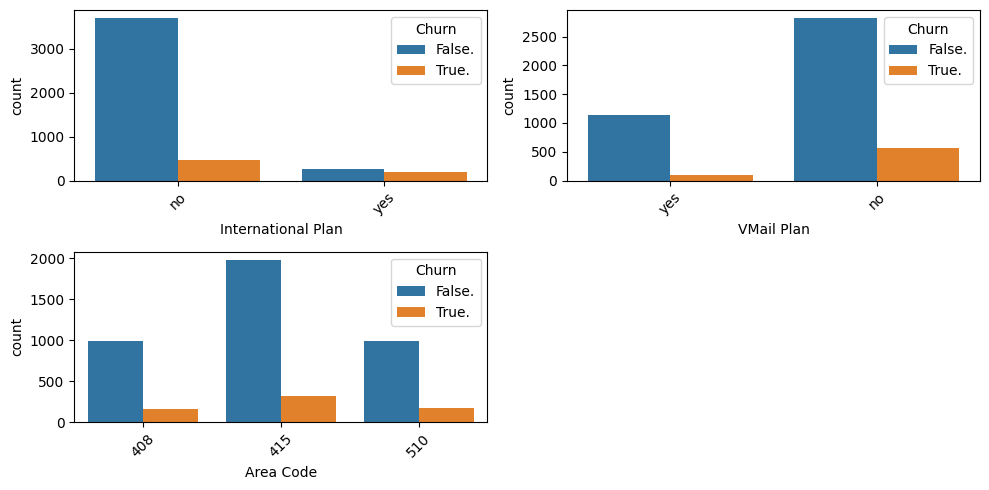

In [ ]:
# Categorical columns (binary and discrete category)
cat_cols =data[['International Plan','VMail Plan','Area Code']]
#creating countplot for Categorical columns
plt.figure(figsize=(10,5))
plotnumber=1
for i in cat_cols:
  if plotnumber<=5:
    plt.subplot(2,2,plotnumber)
    sns.countplot(data=cat_cols,x=cat_cols[i],hue=data.Churn)
    plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()
plt.show()

Insights

1. International Plan

Customers without an international plan (no) make up the majority and also have more total churners.

However, customers who have the international plan (yes) show a higher proportion of churn compared to their group size.

Having an international plan appears to be associated with higher churn risk, possibly due to dissatisfaction with international service or cost.

2. VMail Plan

Most customers do not have a voice mail plan, and this group also has a higher number of churners.

Customers who have the voice mail plan (yes) show much lower churn, even though they are fewer in number.

The voice mail plan may be a positive retention factor, indicating more engaged or satisfied customers.

3. Area Code

All three area codes (408, 415, 510) show similar churn patterns.

Area code 415 has the most customers and also the highest number of churners, but the churn rate appears consistent across regions.

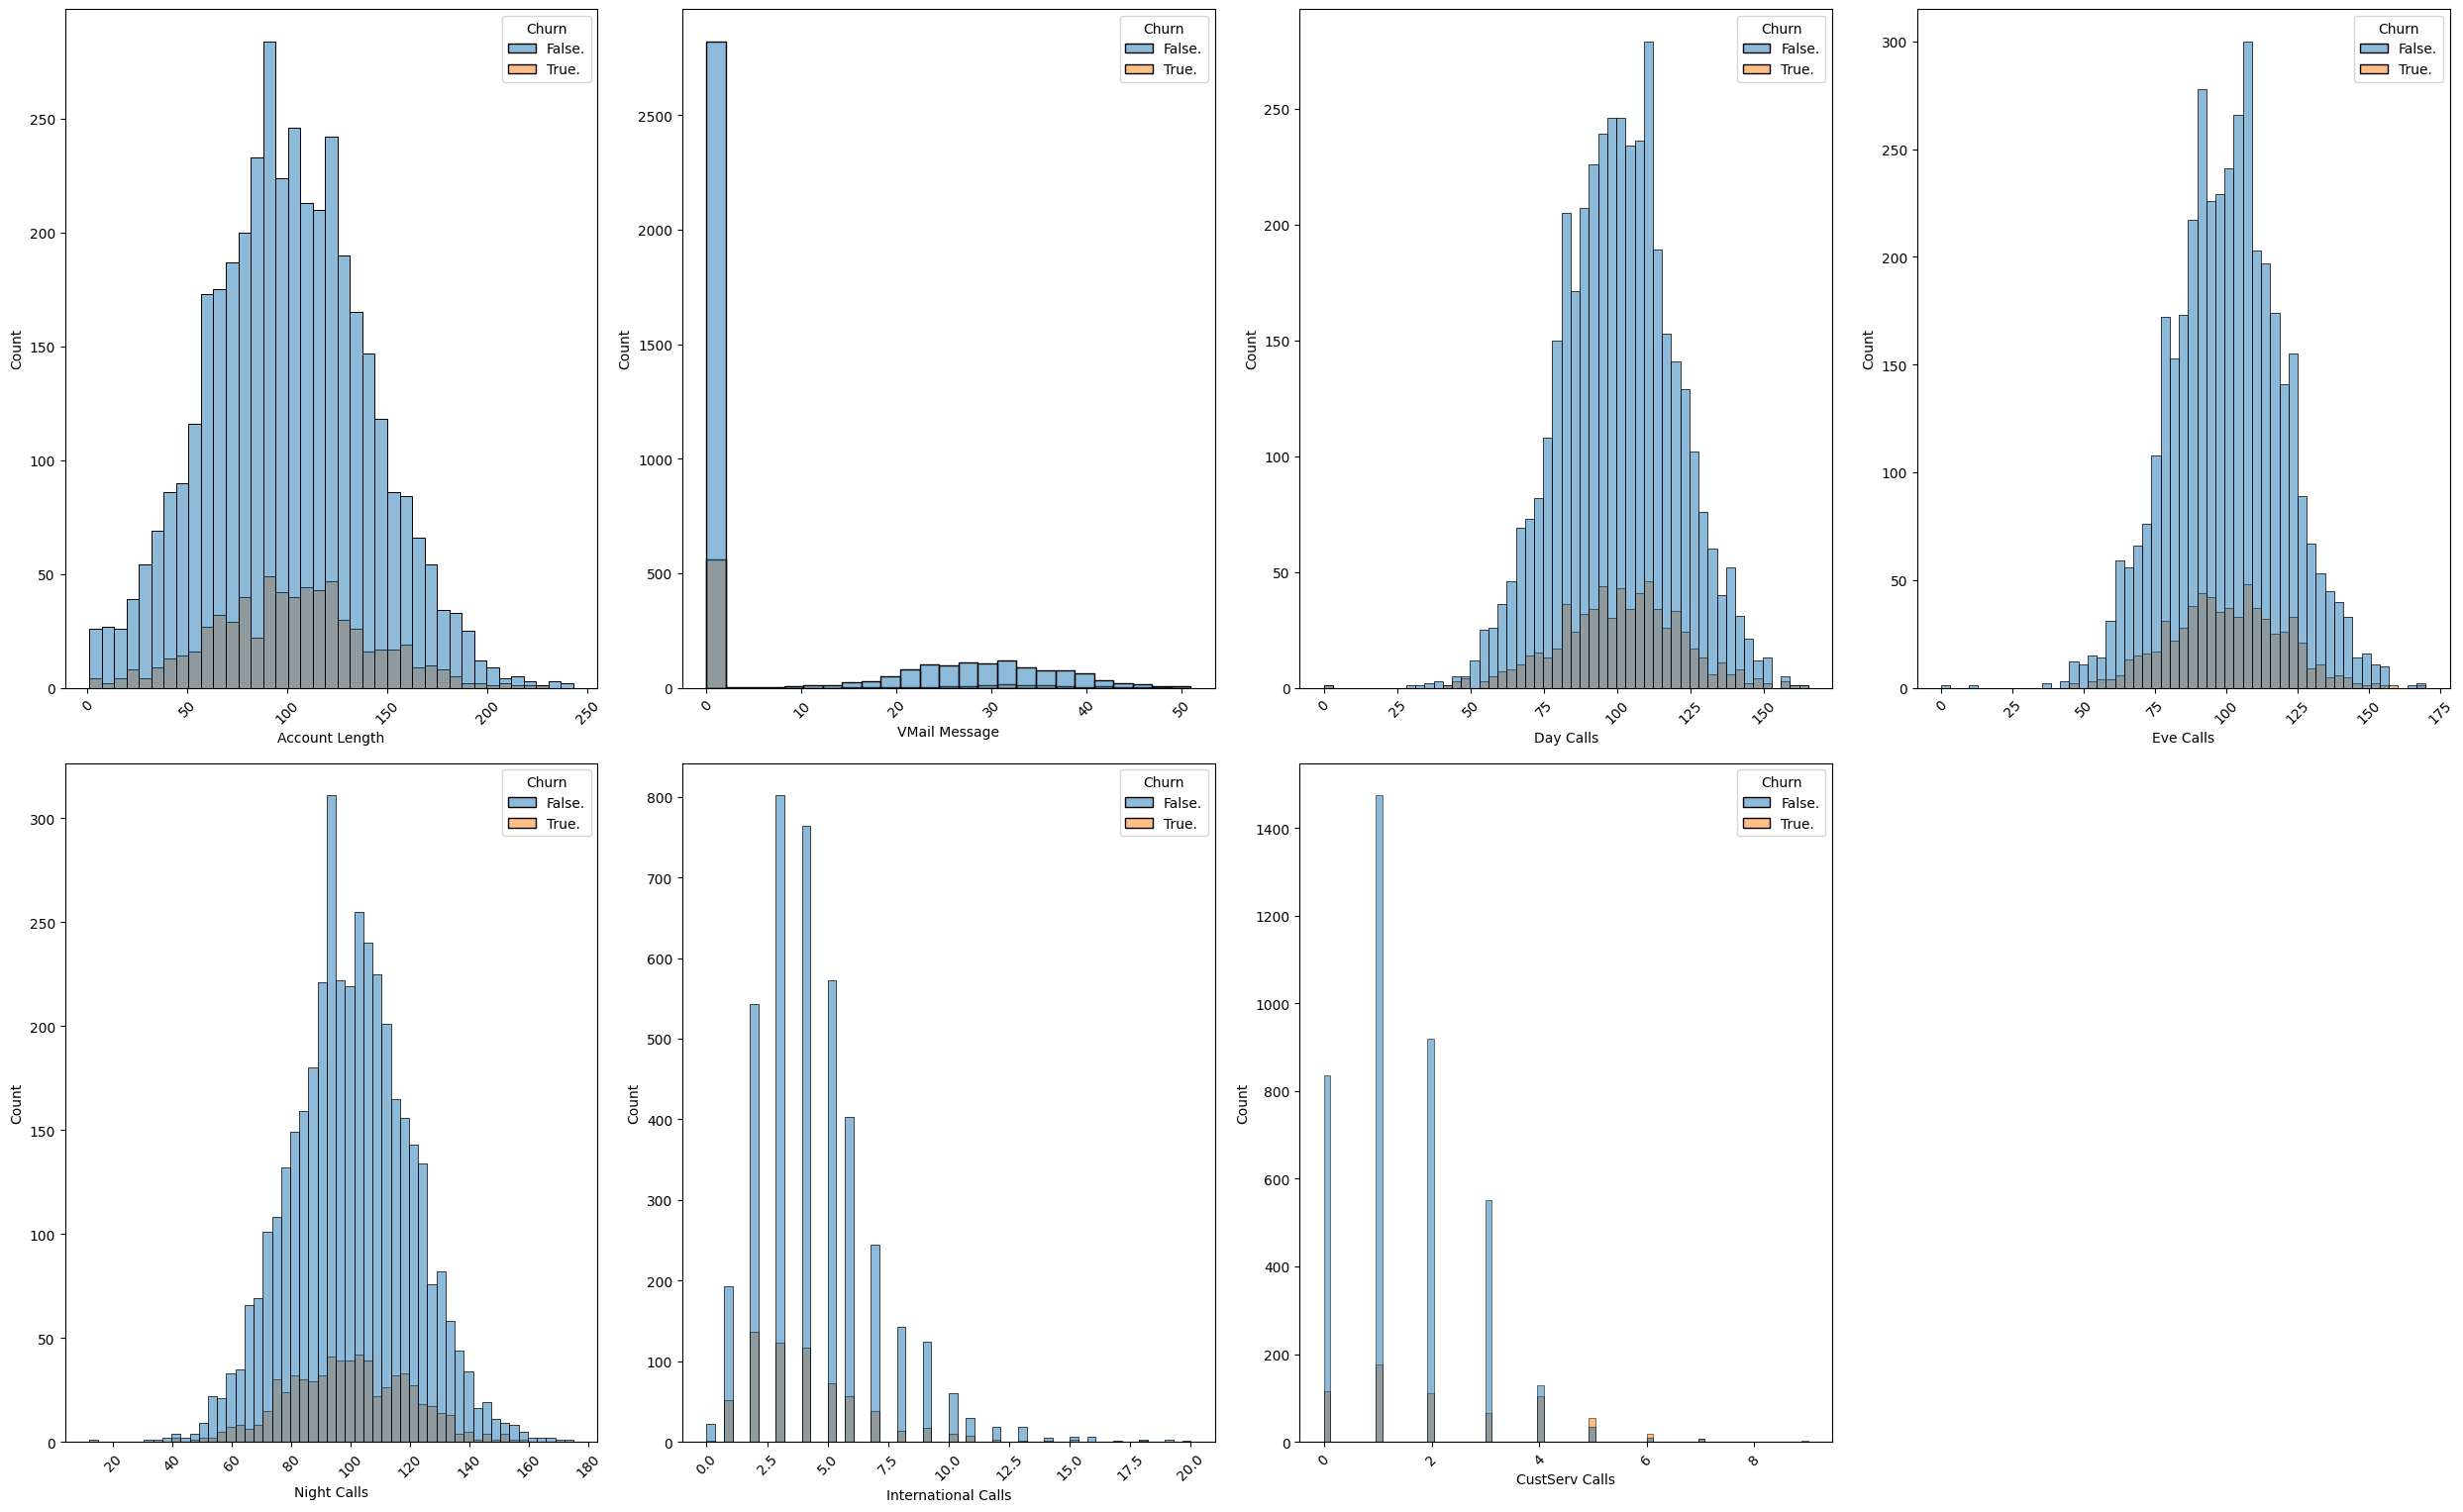

In [ ]:
# Discrete numerical columns
discrete_cols =data[['Account Length', 'VMail Message', 'Day Calls',
                     'Eve Calls', 'Night Calls', 'International Calls', 'CustServ Calls']]

#creating histplot for Discrete numerical columns
plt.figure(figsize=(25,30))
plotnumber=1
for i in discrete_cols:
  if plotnumber<=8:
    plt.subplot(4,4,plotnumber)
    sns.histplot(data=discrete_cols,x=discrete_cols[i],hue=data.Churn)

    plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()
plt.show()

Insights

1. Account Length

Churn and non-churn customers are spread across all account lengths.

The distributions are similar, so account length alone is not a strong churn indicator.

2. VMail Message

Most churned customers have 0 voice mail messages.

Non-churned customers show a wider spread in message counts.

 Not using voice mail is more common among churned users, suggesting less engagement.

3. Day Calls

Both churned and non-churned users are centered around 100 calls.

Slightly more churn appears in higher call volumes, but the pattern is not strong.

Day calls have a neutral or weak relation to churn.

4. Eve Calls

Similar distribution for both churned and non-churned customers.

No visible difference between the groups.

Evening calls do not seem to affect churn risk.

5. Night Calls

Symmetrical distribution with no noticeable difference in churn patterns.

Like Eve Calls, Night Calls don’t help separate churn behavior.

6. International Calls

Churned customers are more concentrated in higher international call counts.

More international calls may indicate higher churn risk, likely tied to dissatisfaction with international service.

CustServ Calls

Clear pattern: churn is highest among customers making 3 or more service calls.

Frequent customer service calls are strongly linked to churn — a likely signal of unresolved complaints or dissatisfaction.


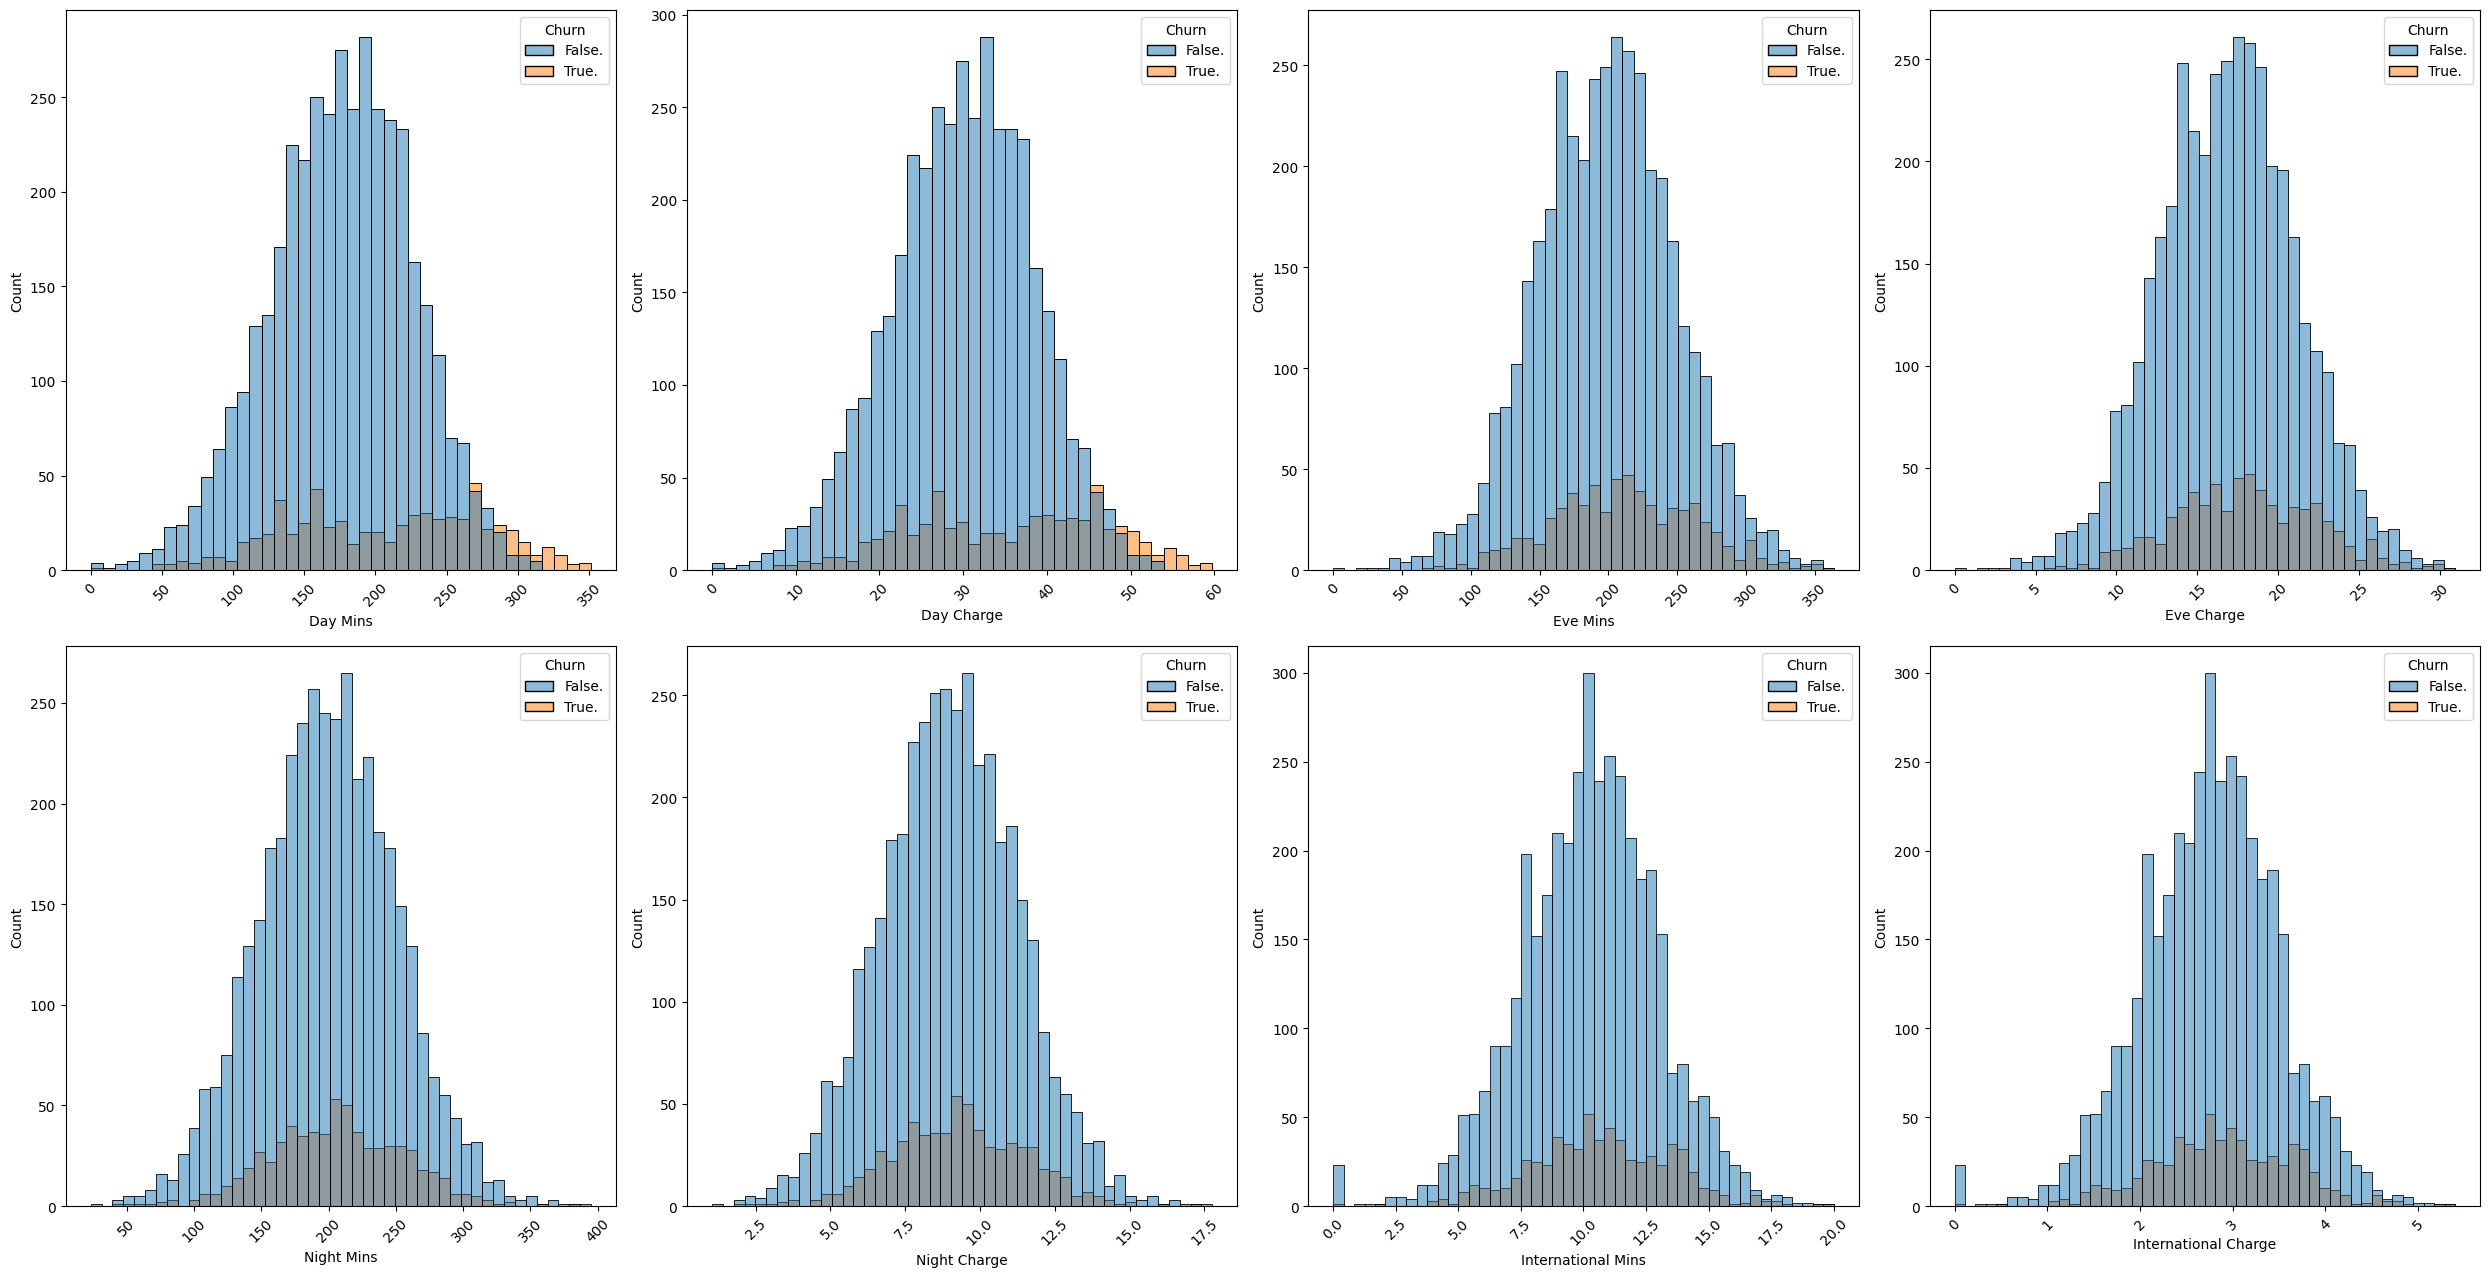

In [ ]:
con_cols =data[['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge',
            'Night Mins', 'Night Charge', 'International Mins', 'International Charge']]


#creating kdeplot for Continuous numerical columns
plt.figure(figsize=(25,25))
plotnumber=1
for i in con_cols:
  if plotnumber<=8:
    plt.subplot(4,4,plotnumber)
    sns.histplot(data=con_cols,x=con_cols[i],hue=data.Churn,fill=True)
    plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()
plt.show()

1. Day Mins & Day Charge

Both plots show more churn among high-usage customers.

Churned users tend to have above 200 minutes or charges > $35.

Customers with high daytime usage and cost are more likely to churn, likely due to pricing dissatisfaction or high billing.

2. Eve Mins & Eve Charge

Churn and non-churn distributions are almost identical in both features.

The churned customers are evenly spread, with no clear peak at higher values.

Evening usage and costs have little to no effect on churn.

3. Night Mins & Night Charge

Both plots show balanced distributions between churned and non-churned users.

No sharp rise in churn at higher usage or cost ranges.

Nighttime usage does not affect churn

4. International Mins & International Charge

Slightly more churn appears in higher usage and charge brackets.

Churned users are more noticeable above 15 international minutes or around $4 in charges.

Higher international usage and cost may have a mild link to churn, possibly due to poor experience or pricing concerns — though not as strong as daytime.

#Data Preprocessing

In [ ]:
data.isnull().sum()/len(data)*100

Account Length          0.0
Area Code               0.0
International Plan      0.0
VMail Plan              0.0
VMail Message           0.0
Day Mins                0.0
Day Calls               0.0
Day Charge              0.0
Eve Mins                0.0
Eve Calls               0.0
Eve Charge              0.0
Night Mins              0.0
Night Calls             0.0
Night Charge            0.0
International Mins      0.0
International Calls     0.0
International Charge    0.0
CustServ Calls          0.0
Churn                   0.0
dtype: float64

# Check for outliers

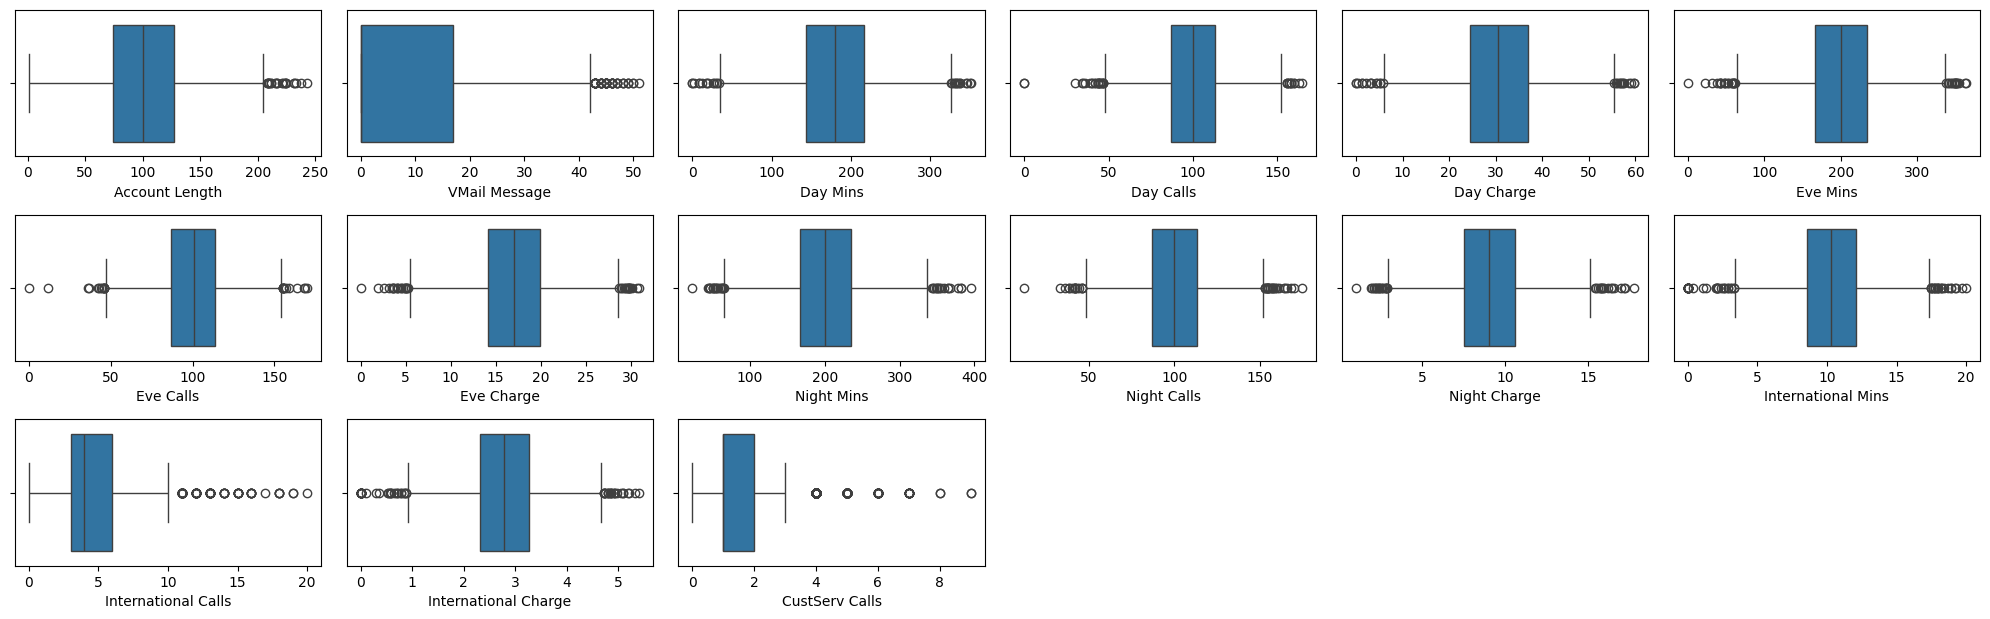

In [ ]:
# List of numerical columns
num_col = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'International Mins',
       'International Calls', 'International Charge', 'CustServ Calls']

# Plotting boxplots for all numerical columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x=data[col])

plt.tight_layout()
plt.show()

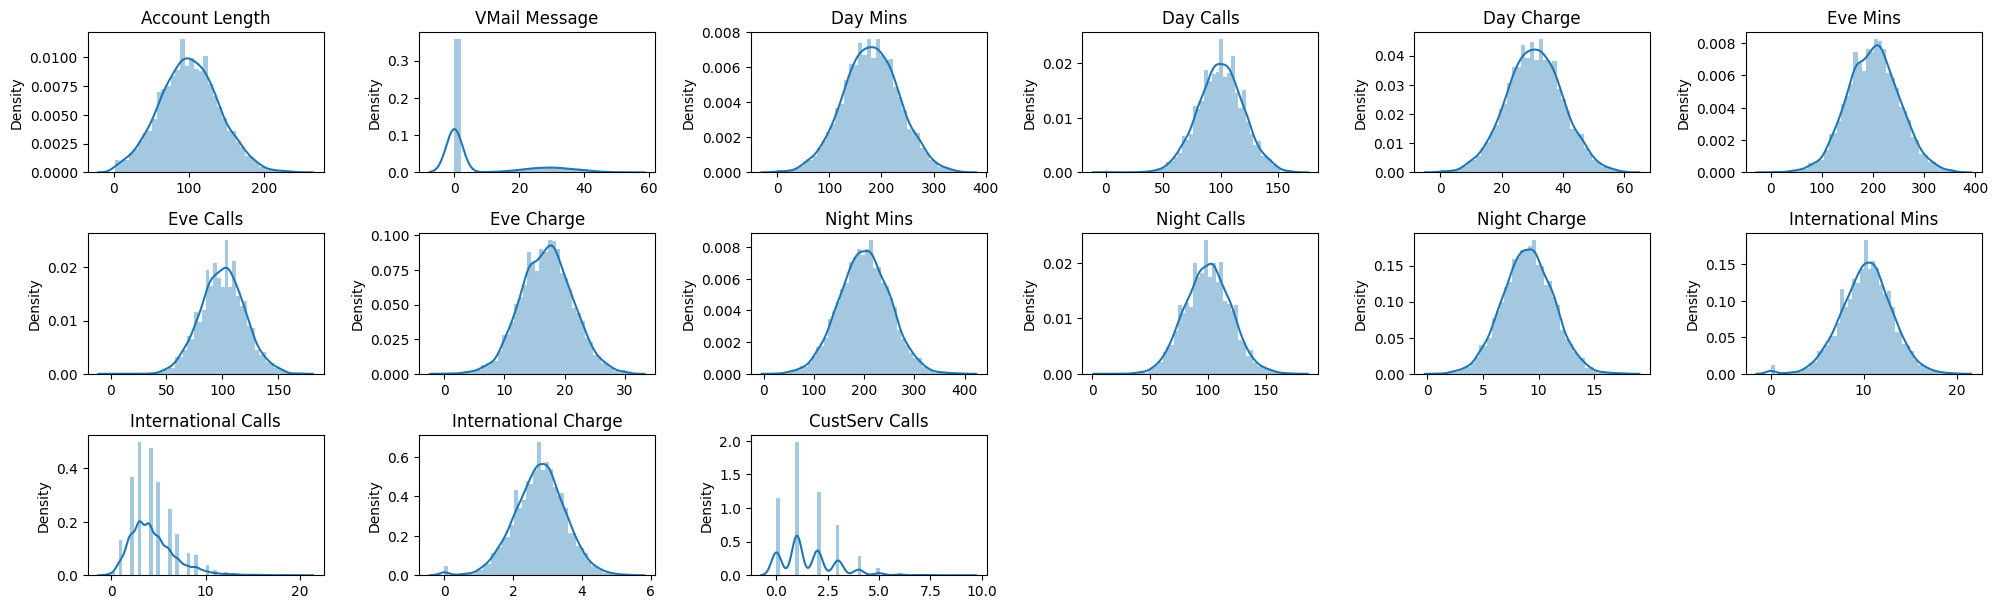

In [ ]:
#creating distplot for numerical columns to know which rule to use whether IQR or 3 sigma
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(6, 6, i)  # 6x6 grid of subplots
    sns.distplot(x=data[col])  # distplot for each column
    plt.title(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# First quantile (Q1)
Q1 = data[num_col].quantile(0.25)  # Use num_col to select numerical columns
# Third quantile (Q3)
Q3 = data[num_col].quantile(0.75)  # Use num_col to select numerical columns
# IQR value
IQR = Q3 - Q1
# Getting the limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Sum of outliers
# Use num_col to select numerical columns for outlier calculation
outliers_count = ((data[num_col] > upper_limit) | (data[num_col] < lower_limit)).sum()
# Percentage of outliers
outliers_percentage = (outliers_count / len(data)) * 100
print('Sum of Outliers: ', outliers_count)
print('Percentage of Outliers:', outliers_percentage)

filtered_columns = outliers_percentage[(outliers_percentage > 0) & (outliers_percentage < 5)]

if filtered_columns.any():
    print("Columns that need to be handled:", filtered_columns)

Sum of Outliers:  Account Length           23
VMail Message            51
Day Mins                 27
Day Calls                34
Day Charge               27
Eve Mins                 36
Eve Calls                25
Eve Charge               36
Night Mins               36
Night Calls              42
Night Charge             36
International Mins       65
International Calls     107
International Charge     65
CustServ Calls          368
dtype: int64
Percentage of Outliers: Account Length          0.498159
VMail Message           1.104613
Day Mins                0.584795
Day Calls               0.736409
Day Charge              0.584795
Eve Mins                0.779727
Eve Calls               0.541477
Eve Charge              0.779727
Night Mins              0.779727
Night Calls             0.909682
Night Charge            0.779727
International Mins      1.407841
International Calls     2.317522
International Charge    1.407841
CustServ Calls          7.970544
dtype: float64
Columns that ne

## **Columns that need to handle outliers are below**
Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge

In [ ]:
outlier=['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International Calls', 'International Charge']


for col in outlier:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    lower_count = len(data[data[col] < lower_limit])
    upper_count = len(data[data[col] > upper_limit])
    total = len(data)

    lower_percent = lower_count / total * 100
    upper_percent = upper_count / total * 100

    print(f"{col}:")
    print(f"  Lower limit: {lower_limit}")
    print(f"  Upper limit: {upper_limit}")
    print(f"  Lower outliers: {lower_count} ({lower_percent:.2f}%)")
    print(f"  Upper outliers: {upper_count} ({upper_percent:.2f}%)\n")


    # Cap the outliers to the IQR limits
    data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

Account Length:
  Lower limit: -5.5
  Upper limit: 206.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 23 (0.50%)

VMail Message:
  Lower limit: -25.5
  Upper limit: 42.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 51 (1.10%)

Day Mins:
  Lower limit: 34.049999999999955
  Upper limit: 326.45000000000005
  Lower outliers: 14 (0.30%)
  Upper outliers: 13 (0.28%)

Day Calls:
  Lower limit: 48.0
  Upper limit: 152.0
  Lower outliers: 22 (0.48%)
  Upper outliers: 12 (0.26%)

Day Charge:
  Lower limit: 5.785
  Upper limit: 55.504999999999995
  Lower outliers: 14 (0.30%)
  Upper outliers: 13 (0.28%)

Eve Mins:
  Lower limit: 63.750000000000014
  Upper limit: 336.15
  Lower outliers: 20 (0.43%)
  Upper outliers: 16 (0.35%)

Eve Calls:
  Lower limit: 46.5
  Upper limit: 154.5
  Lower outliers: 13 (0.28%)
  Upper outliers: 12 (0.26%)

Eve Charge:
  Lower limit: 5.414999999999997
  Upper limit: 28.575000000000003
  Lower outliers: 20 (0.43%)
  Upper outliers: 16 (0.35%)

Night Mins:
  Lower lim

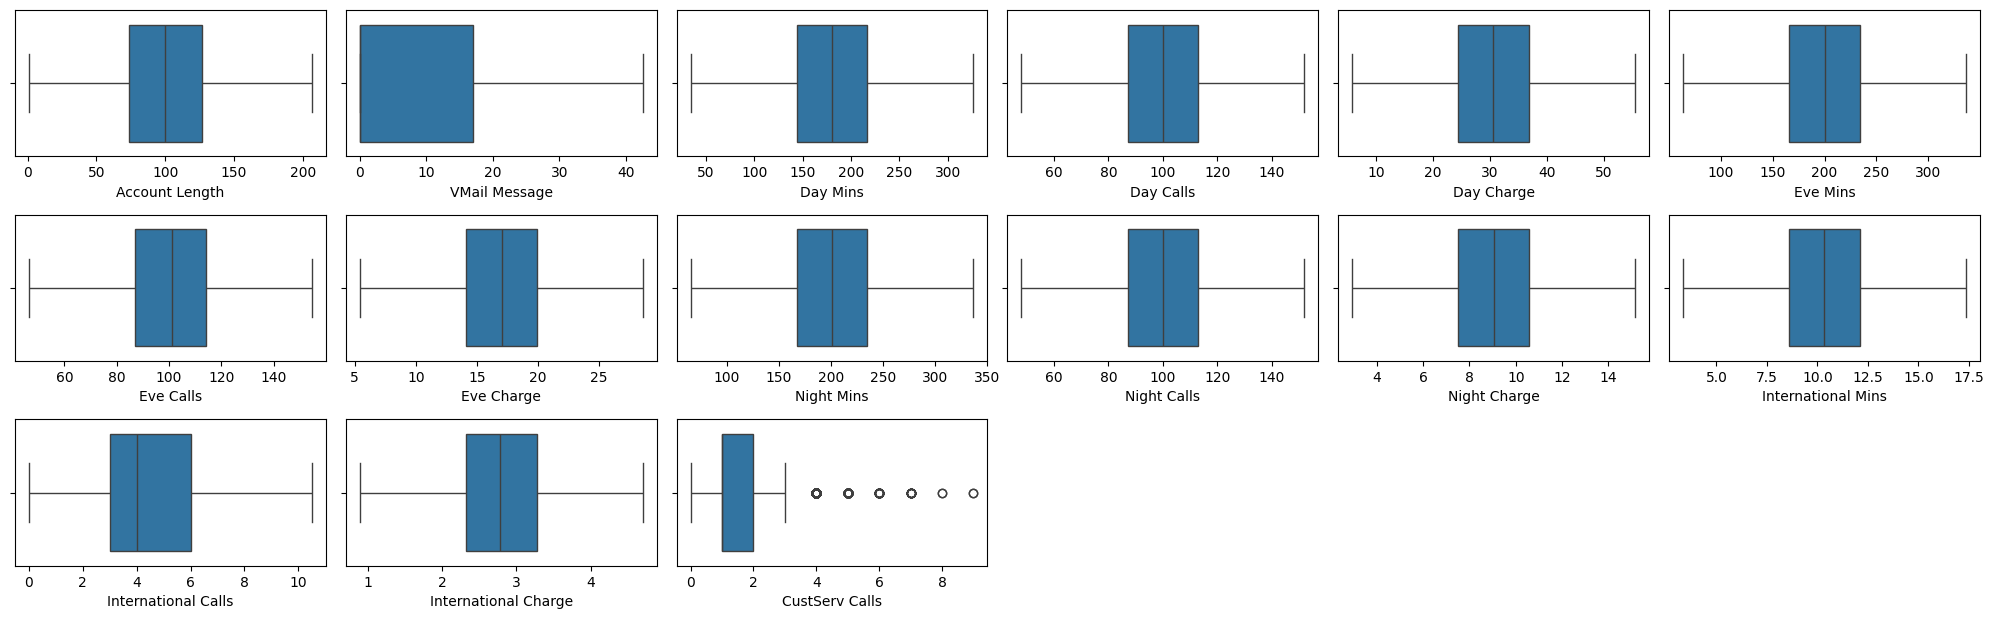

In [ ]:
# List of numerical columns
num_col = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'International Mins',
       'International Calls', 'International Charge', 'CustServ Calls']

# Plotting boxplots for all numerical columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x=data[col])

plt.tight_layout()
plt.show()

# Convert Categorical column to numerical column

In [ ]:
data.columns

Index(['Account Length', 'Area Code', 'International Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'International Mins', 'International Calls', 'International Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [ ]:
data["Area Code"].unique()

array([415, 408, 510])

In [ ]:
data['International Plan'] = data['International Plan'].map({'yes': 1, 'no': 0})
data['VMail Plan'] = data['VMail Plan'].map({'yes': 1, 'no': 0})
data['Churn'] = data['Churn'].map({'True.': 1, 'False.': 0})

In [ ]:
data.head()

Account Length  Area Code  International Plan  VMail Plan  VMail Message  \
0           128.0        415                   0           1           25.0   
1           107.0        415                   0           1           26.0   
2           137.0        415                   0           0            0.0   
3            84.0        408                   1           0            0.0   
4            75.0        415                   1           0            0.0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1      110.0       45.07    197.40       99.0      16.780   
1     161.6      123.0       27.47    195.50      103.0      16.620   
2     243.4      114.0       41.38    121.20      110.0      10.300   
3     299.4       71.0       50.90     63.75       88.0       5.415   
4     166.7      113.0       28.34    148.30      122.0      12.610   

   Night Mins  Night Calls  Night Charge  International Mins  \
0       244.7         91.0         11.01                10.0   
1       254.4        103.0         11.45                13.7   
2       162.6        104.0          7.32                12.2   
3       196.9         89.0          8.86                 6.6   
4       186.9        121.0          8.41                10.1   

   International Calls  International Charge  CustServ Calls  Churn  
0                  3.0                  2.70               1      0  
1                  3.0                  3.70               1      0  
2                  5.0                  3.29               0      0  
3                  7.0                  1.78               2      0  
4                  3.0                  2.73               3      0

In [ ]:
data = pd.get_dummies(data, columns=['Area Code'], drop_first=False,dtype=int)

In [ ]:
data.head()

Account Length  International Plan  VMail Plan  VMail Message  Day Mins  \
0           128.0                   0           1           25.0     265.1   
1           107.0                   0           1           26.0     161.6   
2           137.0                   0           0            0.0     243.4   
3            84.0                   1           0            0.0     299.4   
4            75.0                   1           0            0.0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0      110.0       45.07    197.40       99.0      16.780       244.7   
1      123.0       27.47    195.50      103.0      16.620       254.4   
2      114.0       41.38    121.20      110.0      10.300       162.6   
3       71.0       50.90     63.75       88.0       5.415       196.9   
4      113.0       28.34    148.30      122.0      12.610       186.9   

   Night Calls  Night Charge  International Mins  International Calls  \
0         91.0         11.01                10.0                  3.0   
1        103.0         11.45                13.7                  3.0   
2        104.0          7.32                12.2                  5.0   
3         89.0          8.86                 6.6                  7.0   
4        121.0          8.41                10.1                  3.0   

   International Charge  CustServ Calls  Churn  Area Code_408  Area Code_415  \
0                  2.70               1      0              0              1   
1                  3.70               1      0              0              1   
2                  3.29               0      0              0              1   
3                  1.78               2      0              1              0   
4                  2.73               3      0              0              1   

   Area Code_510  
0              0  
1              0  
2              0  
3              0  
4              0

# Feature Engineering

In [ ]:
plt.figure(figsize=(200,200))
sns.heatmap(data.drop('Churn', axis=1).corr(), annot=True, cmap="RdYlGn", annot_kws={"size":35})

<Axes: >

In [ ]:

# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Absolute correlation matrix (drop self-correlation)
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove self-correlations (1.0)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Set threshold
threshold = 0.8
high_corr = corr_pairs[corr_pairs > threshold]

print(" Highly Correlated Feature Pairs (|r| > 0.8):\n")
print(high_corr)

 Highly Correlated Feature Pairs (|r| > 0.8):

Day Mins            Day Charge              1.000000
Eve Mins            Eve Charge              1.000000
Night Mins          Night Charge            0.999999
International Mins  International Charge    0.999991
VMail Plan          VMail Message           0.957525
dtype: float64


Observation:

 Dropping charges and keep minutes Because:

Charge = Minutes × Rate ➔ charges are just derived from minutes.

Dropping Charge columns will reduce redundancy .

In [ ]:
# Drop highly correlated features
data = data.drop(columns=[
    'Day Charge',
    'Eve Charge',
    'Night Charge',
    'International Charge',
    'VMail Plan'
])

In [ ]:
data.columns

Index(['Account Length', 'International Plan', 'VMail Message', 'Day Mins',
       'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls',
       'International Mins', 'International Calls', 'CustServ Calls', 'Churn',
       'Area Code_408', 'Area Code_415', 'Area Code_510'],
      dtype='object')

In [ ]:
data.head()

Account Length  International Plan  VMail Message  Day Mins  Day Calls  \
0           128.0                   0           25.0     265.1      110.0   
1           107.0                   0           26.0     161.6      123.0   
2           137.0                   0            0.0     243.4      114.0   
3            84.0                   1            0.0     299.4       71.0   
4            75.0                   1            0.0     166.7      113.0   

   Eve Mins  Eve Calls  Night Mins  Night Calls  International Mins  \
0    197.40       99.0       244.7         91.0                10.0   
1    195.50      103.0       254.4        103.0                13.7   
2    121.20      110.0       162.6        104.0                12.2   
3     63.75       88.0       196.9         89.0                 6.6   
4    148.30      122.0       186.9        121.0                10.1   

   International Calls  CustServ Calls  Churn  Area Code_408  Area Code_415  \
0                  3.0               1      0              0              1   
1                  3.0               1      0              0              1   
2                  5.0               0      0              0              1   
3                  7.0               2      0              1              0   
4                  3.0               3      0              0              1   

   Area Code_510  
0              0  
1              0  
2              0  
3              0  
4              0

# Model Creation

In [ ]:
x=data.drop('Churn', axis=1)
y=data['Churn']

In [ ]:
# Step 1: Define columns to apply log1p transformation
log_cols = [
    'VMail Message',
    'Day Mins', 'Eve Mins', 'Night Mins',
    'International Mins',
    'CustServ Calls'
]

# Step 2: Apply log transformation directly to x
x[log_cols] = x[log_cols].apply(np.log1p)

In [ ]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

#Scaling
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# checking the shape of train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3693, 15)
(924, 15)
(3693,)
(924,)


<Axes: xlabel='Churn', ylabel='count'>

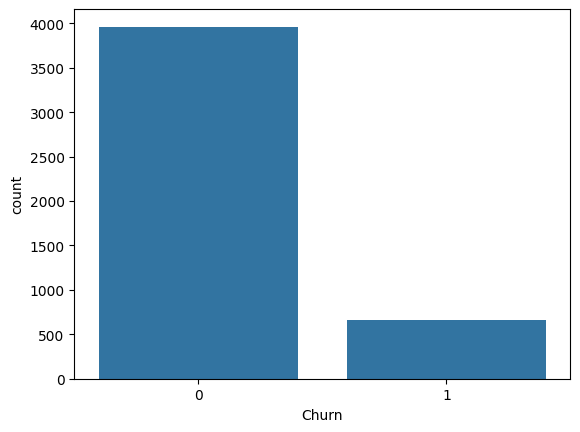

In [ ]:
# check whether SMOTE need to be done or not using countplot for target
sns.countplot(x=data.Churn)

Observation: It seems like 0 has more prediction and 1 has less prediction

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train_scaled,y_train)

In [ ]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0: 3162, 1: 531})
after smote Counter({1: 3162, 0: 3162})


In [ ]:
print(y_smote.value_counts())  # Should be balanced after SMOTE

Churn
1    3162
0    3162
Name: count, dtype: int64


# Model Building

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 1: Train Logistic Regression on SMOTE-balanced, scaled data
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_smote, y_smote)

# -------------------------------
# 1. Evaluation on Original Training Data (Real Distribution)
# -------------------------------
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real = lr.predict(x_train_scaled)

acc_train_real = accuracy_score(y_train, y_pred_train_real)
prec_train_real = precision_score(y_train, y_pred_train_real)
recall_train_real = recall_score(y_train, y_pred_train_real)
f1_train_real = f1_score(y_train, y_pred_train_real)
report_train_real = classification_report(y_train, y_pred_train_real)

print("Accuracy:", acc_train_real)
print("Precision:", prec_train_real)
print("Recall:", recall_train_real)
print("F1-Score:", f1_train_real)
print("Classification Report:\n", report_train_real)

# -------------------------------
# 2. Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test = lr.predict(x_test_scaled)

acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)
print("Classification Report:\n", report_test)
print("Confusion Matrix:\n", cm_test)

# -------------------------------
# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote = lr.predict(x_smote)

acc_train_smote = accuracy_score(y_smote, y_pred_train_smote)
prec_train_smote = precision_score(y_smote, y_pred_train_smote)
recall_train_smote = recall_score(y_smote, y_pred_train_smote)
f1_train_smote = f1_score(y_smote, y_pred_train_smote)

print("Accuracy:", acc_train_smote)
print("Precision:", prec_train_smote)
print("Recall:", recall_train_smote)
print("F1-Score:", f1_train_smote)



========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.7316544814513946
Precision: 0.3076923076923077
Recall: 0.6930320150659134
F1-Score: 0.4261725535610886
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82      3162
           1       0.31      0.69      0.43       531

    accuracy                           0.73      3693
   macro avg       0.62      0.72      0.63      3693
weighted avg       0.84      0.73      0.77      3693


========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.7132034632034632
Precision: 0.2865853658536585
Recall: 0.752
F1-Score: 0.41501103752759383
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       799
           1       0.29      0.75      0.42       125

    accuracy                           0.71       924
   macro avg       0.62      0.73    

# ROC

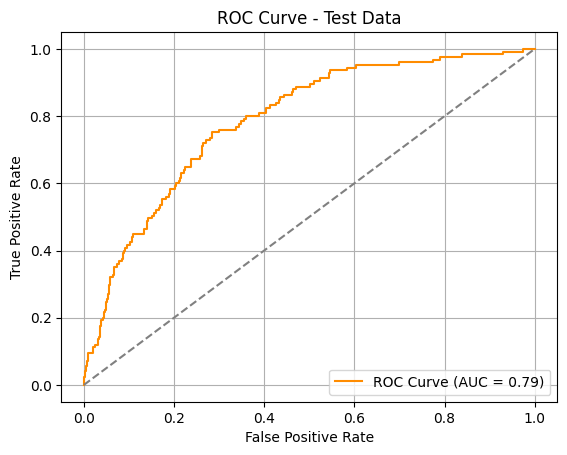

In [ ]:
#  ROC Curve on Test Data ---
from sklearn.metrics import roc_auc_score, RocCurveDisplay,roc_curve, auc

y_proba = lr.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Data")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
coeff_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': lr.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                Feature  Coefficient
1    International Plan     2.535634
3              Day Mins     0.849268
11       CustServ Calls     0.528903
5              Eve Mins     0.390213
7            Night Mins     0.310376
9    International Mins     0.222110
0        Account Length     0.107301
13        Area Code_415     0.059400
4             Day Calls     0.045429
12        Area Code_408    -0.024091
6             Eve Calls    -0.026847
14        Area Code_510    -0.035309
8           Night Calls    -0.040484
10  International Calls    -0.309052
2         VMail Message    -0.983641


# Insights:
 Top Features Driving Churn:

**International Plan (2.44)**-

 Strongest positive influence on churn.

 Customers with an international plan are much more likely to leave.

**Day Minutes (0.79)**-

 Customers who use more minutes during the day tend to churn more.

**Customer Service Calls (0.48)**-

More service complaints = higher churn. Indicates dissatisfaction.

**Evening, Night, and International Minutes (0.40 to 0.26)**-

 High usage in these time bands is also linked to higher churn, though less strongly than day minutes.

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
# -------------------------------
# 1. Train SVC on SMOTE-balanced, scaled data
# -------------------------------
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(x_smote, y_smote)

SVC(probability=True, random_state=42)

# Evaluation

In [ ]:
# -------------------------------
# 1. Evaluation on Original Training Data (Real Distribution)
# -------------------------------
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real_svc = svc.predict(x_train_scaled)

acc_train_real_svc = accuracy_score(y_train, y_pred_train_real_svc)
prec_train_real_svc = precision_score(y_train, y_pred_train_real_svc)
recall_train_real_svc = recall_score(y_train, y_pred_train_real_svc)
f1_train_real_svc = f1_score(y_train, y_pred_train_real_svc)
report_train_real_svc = classification_report(y_train, y_pred_train_real_svc)

print("Accuracy:", acc_train_real_svc)
print("Precision:", prec_train_real_svc)
print("Recall:", recall_train_real_svc)
print("F1-Score:", f1_train_real_svc)
print("Classification Report:\n", report_train_real_svc)

# -------------------------------
# 2. Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test_svc = svc.predict(x_test_scaled)

acc_test_svc = accuracy_score(y_test, y_pred_test_svc)
prec_test_svc = precision_score(y_test, y_pred_test_svc)
recall_test_svc = recall_score(y_test, y_pred_test_svc)
f1_test_svc = f1_score(y_test, y_pred_test_svc)
report_test_svc = classification_report(y_test, y_pred_test_svc)
cm_test_svc = confusion_matrix(y_test, y_pred_test_svc)

print("Accuracy:", acc_test_svc)
print("Precision:", prec_test_svc)
print("Recall:", recall_test_svc)
print("F1-Score:", f1_test_svc)
print("Classification Report:\n", report_test_svc)
print("Confusion Matrix:\n", cm_test_svc)

# -------------------------------
# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote_svc = svc.predict(x_smote)

acc_train_smote_svc = accuracy_score(y_smote, y_pred_train_smote_svc)
prec_train_smote_svc = precision_score(y_smote, y_pred_train_smote_svc)
recall_train_smote_svc = recall_score(y_smote, y_pred_train_smote_svc)
f1_train_smote_svc = f1_score(y_smote, y_pred_train_smote_svc)

print("Accuracy:", acc_train_smote_svc)
print("Precision:", prec_train_smote_svc)
print("Recall:", recall_train_smote_svc)
print("F1-Score:", f1_train_smote_svc)



========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.9271594909287841
Precision: 0.690406976744186
Recall: 0.8945386064030132
F1-Score: 0.7793273174733388
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      3162
           1       0.69      0.89      0.78       531

    accuracy                           0.93      3693
   macro avg       0.84      0.91      0.87      3693
weighted avg       0.94      0.93      0.93      3693


========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.8603896103896104
Precision: 0.489247311827957
Recall: 0.728
F1-Score: 0.5852090032154341
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       799
           1       0.49      0.73      0.59       125

    accuracy                           0.86       924
   macro avg       0.72      0.80      0

# ROC Curve and Precision-Recall Curve on SVC

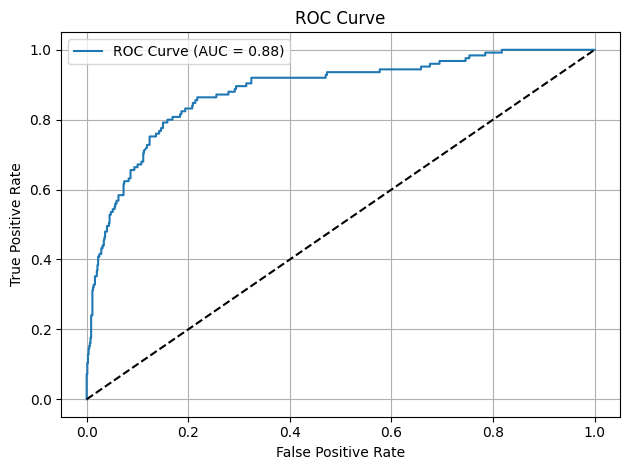

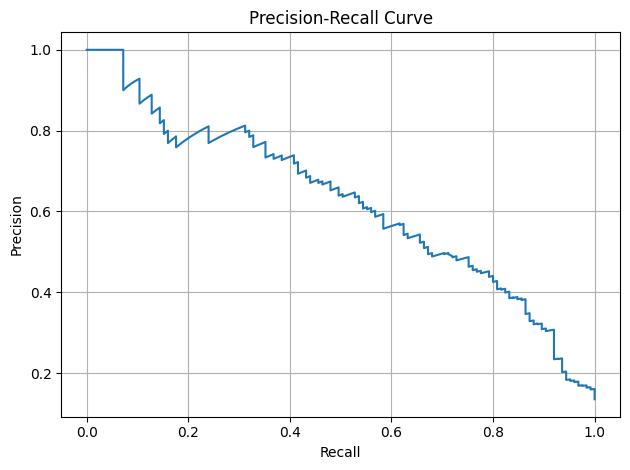

In [ ]:
# -------------------------------
#  ROC Curve and Precision-Recall Curve
# -------------------------------
if len(set(y_test)) == 2:
    y_score = svc.predict_proba(x_test_scaled)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid()
    plt.tight_layout()
    plt.show()




# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 1: Train Decision Tree on SMOTE-balanced, scaled data
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt.fit(x_smote, y_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:


# -------------------------------
# 1. Evaluation on Original Training Data (Real Distribution)
# -------------------------------
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real_dt = dt.predict(x_train_scaled)

acc_train_real_dt = accuracy_score(y_train, y_pred_train_real_dt)
prec_train_real_dt = precision_score(y_train, y_pred_train_real_dt)
recall_train_real_dt = recall_score(y_train, y_pred_train_real_dt)
f1_train_real_dt = f1_score(y_train, y_pred_train_real_dt)
report_train_real_dt = classification_report(y_train, y_pred_train_real_dt)

print("Accuracy:", acc_train_real_dt)
print("Precision:", prec_train_real_dt)
print("Recall:", recall_train_real_dt)
print("F1-Score:", f1_train_real_dt)
print("Classification Report:\n", report_train_real_dt)

# -------------------------------
# 2. Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test_dt = dt.predict(x_test_scaled)

acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
prec_test_dt = precision_score(y_test, y_pred_test_dt)
recall_test_dt = recall_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)
report_test_dt = classification_report(y_test, y_pred_test_dt)
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt)

print("Accuracy:", acc_test_dt)
print("Precision:", prec_test_dt)
print("Recall:", recall_test_dt)
print("F1-Score:", f1_test_dt)
print("Classification Report:\n", report_test_dt)
print("Confusion Matrix:\n", cm_test_dt)

# -------------------------------
# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote_dt = dt.predict(x_smote)

acc_train_smote_dt = accuracy_score(y_smote, y_pred_train_smote_dt)
prec_train_smote_dt = precision_score(y_smote, y_pred_train_smote_dt)
recall_train_smote_dt = recall_score(y_smote, y_pred_train_smote_dt)
f1_train_smote_dt = f1_score(y_smote, y_pred_train_smote_dt)

print("Accuracy:", acc_train_smote_dt)
print("Precision:", prec_train_smote_dt)
print("Recall:", recall_train_smote_dt)
print("F1-Score:", f1_train_smote_dt)



========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.9333874898456539
Precision: 0.7427597955706985
Recall: 0.8210922787193974
F1-Score: 0.7799642218246869
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3162
           1       0.74      0.82      0.78       531

    accuracy                           0.93      3693
   macro avg       0.86      0.89      0.87      3693
weighted avg       0.94      0.93      0.93      3693


========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.9188311688311688
Precision: 0.668918918918919
Recall: 0.792
F1-Score: 0.7252747252747253
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       799
           1       0.67      0.79      0.73       125

    accuracy                           0.92       924
   macro avg       0.82      0.87      

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate the classifier
dt = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit on SMOTE-balanced training data
grid_search.fit(x_smote, y_smote)

# Best estimator
dt_best = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Fitting Hyperparameter Tuned Value

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Create Decision Tree with best hyperparameters
dt_best = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train on SMOTE-balanced training data (scaled)
dt_best.fit(x_smote, y_smote)

# Predict on test data (scaled)
y_pred_test_dt_ht = dt_best.predict(x_test_scaled)

# Evaluate predictions



acc_test_dt_ht = accuracy_score(y_test, y_pred_test_dt_ht)
prec_test_dt_ht = precision_score(y_test, y_pred_test_dt_ht)
recall_test_dt_ht = recall_score(y_test, y_pred_test_dt_ht)
f1_test_dt_ht = f1_score(y_test, y_pred_test_dt_ht)
report_test_dt_ht = classification_report(y_test, y_pred_test_dt_ht)
cm_test_dt_ht = confusion_matrix(y_test, y_pred_test_dt_ht)

print("Accuracy:", acc_test_dt_ht)
print("Precision:", prec_test_dt_ht)
print("Recall:", recall_test_dt_ht)
print("F1-Score:", f1_test_dt_ht)
print("Classification Report:\n", report_test_dt_ht)
print("Confusion Matrix:\n", cm_test_dt_ht)



Accuracy: 0.9025974025974026
Precision: 0.610062893081761
Recall: 0.776
F1-Score: 0.6830985915492958
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       799
           1       0.61      0.78      0.68       125

    accuracy                           0.90       924
   macro avg       0.79      0.85      0.81       924
weighted avg       0.92      0.90      0.91       924

Confusion Matrix:
 [[737  62]
 [ 28  97]]


# precision_recall_curve of DT and Threshold Tuning


Best Threshold: 0.80
Precision at Best Threshold: 0.69
Recall at Best Threshold: 0.77
F1 Score at Best Threshold: 0.73


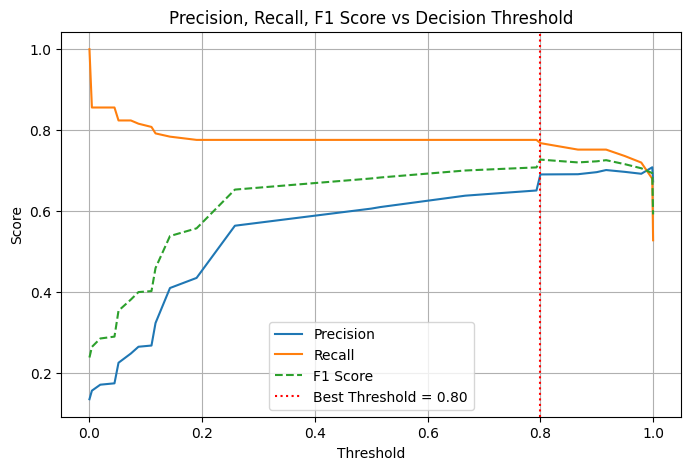


=== Evaluation with Tuned Threshold ===
Confusion Matrix:
 [[756  43]
 [ 29  96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       799
           1       0.69      0.77      0.73       125

    accuracy                           0.92       924
   macro avg       0.83      0.86      0.84       924
weighted avg       0.93      0.92      0.92       924



In [ ]:
from sklearn.metrics import precision_recall_curve


# Predict probabilities for the positive class (class 1)
y_proba_test = dt_best.predict_proba(x_test_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Find the best threshold based on highest F1 score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"Precision at Best Threshold: {precision[best_index]:.2f}")
print(f"Recall at Best Threshold: {recall[best_index]:.2f}")
print(f"F1 Score at Best Threshold: {f1_scores[best_index]:.2f}")

# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", linestyle='--')
plt.axvline(best_threshold, color='red', linestyle=':', label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 Score vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Apply best threshold to predicted probabilities
y_pred_custom = (y_proba_test >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

# Evaluate with tuned threshold
print("\n=== Evaluation with Tuned Threshold ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest on SMOTE-balanced, scaled data
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_smote, y_smote)

# === Test Data Evaluation ===
y_pred_test_rf = RF.predict(x_test_scaled)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
prec_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf)
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

print("\n=== Test Data Evaluation (Real-World Performance) ===")
print("Accuracy:", acc_test_rf)
print("Precision:", prec_test_rf)
print("Recall:", recall_test_rf)
print("F1-Score:", f1_test_rf)
print("Classification Report:\n", report_test_rf)
print("Confusion Matrix:\n", cm_test_rf)

# === Training Data Evaluation (Original Distribution) ===
y_pred_train_rf = RF.predict(x_train_scaled)
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
prec_train_rf = precision_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)
report_train_rf = classification_report(y_train, y_pred_train_rf)
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)

print("\n=== Training Data Evaluation (Original Distribution) ===")
print("Accuracy:", acc_train_rf)
print("Precision:", prec_train_rf)
print("Recall:", recall_train_rf)
print("F1-Score:", f1_train_rf)
print("Classification Report:\n", report_train_rf)
print("Confusion Matrix:\n", cm_train_rf)

# === SMOTE-balanced Training Data Evaluation (Overfitting Check) ===
y_pred_smote_rf = RF.predict(x_smote)
acc_smote_rf = accuracy_score(y_smote, y_pred_smote_rf)
prec_smote_rf = precision_score(y_smote, y_pred_smote_rf)
recall_smote_rf = recall_score(y_smote, y_pred_smote_rf)
f1_smote_rf = f1_score(y_smote, y_pred_smote_rf)

print("\n=== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ===")
print("Accuracy:", acc_smote_rf)
print("Precision:", prec_smote_rf)
print("Recall:", recall_smote_rf)
print("F1-Score:", f1_smote_rf)



=== Test Data Evaluation (Real-World Performance) ===
Accuracy: 0.9383116883116883
Precision: 0.7698412698412699
Recall: 0.776
F1-Score: 0.7729083665338645
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       799
           1       0.77      0.78      0.77       125

    accuracy                           0.94       924
   macro avg       0.87      0.87      0.87       924
weighted avg       0.94      0.94      0.94       924

Confusion Matrix:
 [[770  29]
 [ 28  97]]

=== Training Data Evaluation (Original Distribution) ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3162
           1       1.00      1.00      1.00       531

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.

In [ ]:
# Cross-validation on SMOTE data
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RF, x_smote, y_smote, cv=5, scoring='f1')
print("\n=== Cross-Validation on SMOTE Data ===")
print("F1 CV Scores:", cv_scores)
print("Mean F1 CV Score:", cv_scores.mean())
print("Std Dev F1 CV Score:", cv_scores.std())





=== Cross-Validation on SMOTE Data ===
F1 CV Scores: [0.93532338 0.9540412  0.96855346 0.96622152 0.96513471]
Mean F1 CV Score: 0.9578548554830413
Std Dev F1 CV Score: 0.012326140347319542


# Hyperparamter tuning of RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV on SMOTE data
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],  # shallower trees to reduce overfitting
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_smote, y_smote)

# Best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predictions
y_pred_test_rf_ht = best_rf.predict(x_test_scaled)
y_pred_train_rf_ht = best_rf.predict(x_train_scaled)
y_pred_smote_rf_ht = best_rf.predict(x_smote)

# Evaluation on Test Data
acc_test_rf_ht = accuracy_score(y_test, y_pred_test_rf_ht)
prec_test_rf_ht = precision_score(y_test, y_pred_test_rf_ht)
recall_test_rf_ht = recall_score(y_test, y_pred_test_rf_ht)
f1_test_rf_ht = f1_score(y_test, y_pred_test_rf_ht)
report_test_rf_ht = classification_report(y_test, y_pred_test_rf_ht)
cm_test_rf_ht = confusion_matrix(y_test, y_pred_test_rf_ht)

print("\n=== rf_ht Test Data Evaluation (Real-World Performance) ===")
print("Accuracy (acc_test_rf_ht):", acc_test_rf_ht)
print("Precision (prec_test_rf_ht):", prec_test_rf_ht)
print("Recall (recall_test_rf_ht):", recall_test_rf_ht)
print("F1-Score (f1_test_rf_ht):", f1_test_rf_ht)
print("Classification Report:\n", report_test_rf_ht)
print("Confusion Matrix:\n", cm_test_rf_ht)

# Evaluation on Training Data (Original Distribution)
acc_train_rf_ht = accuracy_score(y_train, y_pred_train_rf_ht)
prec_train_rf_ht = precision_score(y_train, y_pred_train_rf_ht)
recall_train_rf_ht = recall_score(y_train, y_pred_train_rf_ht)
f1_train_rf_ht = f1_score(y_train, y_pred_train_rf_ht)
report_train_rf_ht = classification_report(y_train, y_pred_train_rf_ht)
cm_train_rf_ht = confusion_matrix(y_train, y_pred_train_rf_ht)

print("\n=== rf_ht Training Data Evaluation (Original Distribution) ===")
print("Accuracy (acc_train_rf_ht):", acc_train_rf_ht)
print("Precision (prec_train_rf_ht):", prec_train_rf_ht)
print("Recall (recall_train_rf_ht):", recall_train_rf_ht)
print("F1-Score (f1_train_rf_ht):", f1_train_rf_ht)
print("Classification Report:\n", report_train_rf_ht)
print("Confusion Matrix:\n", cm_train_rf_ht)

# Evaluation on SMOTE Balanced Training Data (Overfitting Check)
acc_smote_rf_ht = accuracy_score(y_smote, y_pred_smote_rf_ht)
prec_smote_rf_ht = precision_score(y_smote, y_pred_smote_rf_ht)
recall_smote_rf_ht = recall_score(y_smote, y_pred_smote_rf_ht)
f1_smote_rf_ht = f1_score(y_smote, y_pred_smote_rf_ht)
report_smote_rf_ht = classification_report(y_smote, y_pred_smote_rf_ht)
cm_smote_rf_ht = confusion_matrix(y_smote, y_pred_smote_rf_ht)

print("\n=== rf_ht SMOTE-Balanced Training Data Evaluation (Overfitting Check) ===")
print("Accuracy (acc_smote_rf_ht):", acc_smote_rf_ht)
print("Precision (prec_smote_rf_ht):", prec_smote_rf_ht)
print("Recall (recall_smote_rf_ht):", recall_smote_rf_ht)
print("F1-Score (f1_smote_rf_ht):", f1_smote_rf_ht)
print("Classification Report:\n", report_smote_rf_ht)
print("Confusion Matrix:\n", cm_smote_rf_ht)

print("\nBest Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits

=== rf_ht Test Data Evaluation (Real-World Performance) ===
Accuracy (acc_test_rf_ht): 0.9155844155844156
Precision (prec_test_rf_ht): 0.6556291390728477
Recall (recall_test_rf_ht): 0.792
F1-Score (f1_test_rf_ht): 0.717391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       799
           1       0.66      0.79      0.72       125

    accuracy                           0.92       924
   macro avg       0.81      0.86      0.83       924
weighted avg       0.92      0.92      0.92       924

Confusion Matrix:
 [[747  52]
 [ 26  99]]

=== rf_ht Training Data Evaluation (Original Distribution) ===
Accuracy (acc_train_rf_ht): 0.9528838342810723
Precision (prec_train_rf_ht): 0.8299445471349353
Recall (recall_train_rf_ht): 0.8455743879472694
F1-Score (f1_train_rf_ht): 0.8376865671641791
Classification Report:
               precision    recall  

# ROC curve

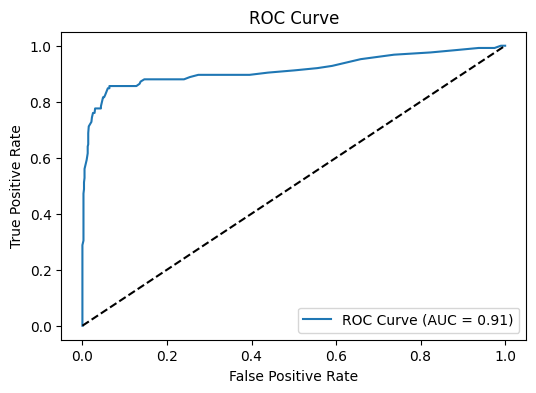

In [ ]:
# Predicted probabilities for positive class
y_proba_test = RF.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve

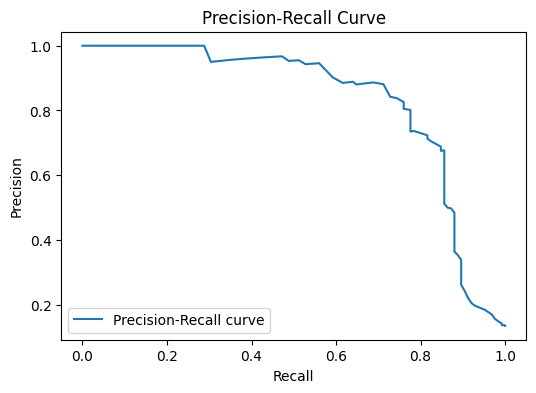

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_test)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


# Threshold Tuning for Precision/Recall Trade-offs

In [ ]:
from sklearn.metrics import f1_score

best_threshold = 0.5
best_f1 = 0

# To Try thresholds from 0 to 1 with step 0.01
for thresh in [i * 0.01 for i in range(100)]:
    y_pred_thresh = (y_proba_test >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score at Threshold: {best_f1:.4f}")

# Evaluate model at best threshold
y_pred_custom = (y_proba_test >= best_threshold).astype(int)

print("\nConfusion Matrix at Best Threshold:")
print(confusion_matrix(y_test, y_pred_custom))

# Print precision, recall, and f1-score at best threshold
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print(f"\nPrecision at Best Threshold ({best_threshold:.2f}): {precision_custom:.4f}")
print(f"Recall at Best Threshold ({best_threshold:.2f}): {recall_custom:.4f}")
print(f"F1-Score at Best Threshold ({best_threshold:.2f}): {f1_custom:.4f}")

print("\nClassification Report at Best Threshold:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))



Best Threshold: 0.54
Best F1 Score at Threshold: 0.7917

Confusion Matrix at Best Threshold:
[[779  20]
 [ 30  95]]

Precision at Best Threshold (0.54): 0.8261
Recall at Best Threshold (0.54): 0.7600
F1-Score at Best Threshold (0.54): 0.7917

Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       799
           1       0.83      0.76      0.79       125

    accuracy                           0.95       924
   macro avg       0.89      0.87      0.88       924
weighted avg       0.94      0.95      0.94       924



# Insight

 **Day Mins**  - Customers who use more day minutes are more likely to churn — possibly due to high usage costs or dissatisfaction with day rates.

 **CustServ Calls**  - Higher customer service calls strongly correlate with churn — could reflect frustration or unresolved issues.   
                   
**International Plan**  -  If a customer has an international plan, they are more likely to churn — maybe due to unexpected charges or better alternatives

 **International Calls** - International calling behavior impacts churn, especially volume and costs.

 **Eve Mins**   -Evening usage has a moderate effect; heavy users may feel plans don't suit their timing.                                          


# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train XGBoost on SMOTE-balanced, scaled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_smote, y_smote)

# === Test Data Evaluation ===
y_pred_test_xgb = xgb_model.predict(x_test_scaled)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
prec_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
report_test_xgb = classification_report(y_test, y_pred_test_xgb)
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

print("\n=== Test Data Evaluation (Real-World Performance) ===")
print("Accuracy:", acc_test_xgb)
print("Precision:", prec_test_xgb)
print("Recall:", recall_test_xgb)
print("F1-Score:", f1_test_xgb)
print("Classification Report:\n", report_test_xgb)
print("Confusion Matrix:\n", cm_test_xgb)

# === Training Data Evaluation (Original Distribution) ===
y_pred_train_xgb = xgb_model.predict(x_train_scaled)
acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
prec_train_xgb = precision_score(y_train, y_pred_train_xgb)
recall_train_xgb = recall_score(y_train, y_pred_train_xgb)
f1_train_xgb = f1_score(y_train, y_pred_train_xgb)
report_train_xgb = classification_report(y_train, y_pred_train_xgb)
cm_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)

print("\n=== Training Data Evaluation (Original Distribution) ===")
print("Accuracy:", acc_train_xgb)
print("Precision:", prec_train_xgb)
print("Recall:", recall_train_xgb)
print("F1-Score:", f1_train_xgb)
print("Classification Report:\n", report_train_xgb)
print("Confusion Matrix:\n", cm_train_xgb)

# === SMOTE-balanced Training Data Evaluation (Overfitting Check) ===
y_pred_smote_xgb = xgb_model.predict(x_smote)
acc_smote_xgb = accuracy_score(y_smote, y_pred_smote_xgb)
prec_smote_xgb = precision_score(y_smote, y_pred_smote_xgb)
recall_smote_xgb = recall_score(y_smote, y_pred_smote_xgb)
f1_smote_xgb = f1_score(y_smote, y_pred_smote_xgb)

print("\n=== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ===")
print("Accuracy:", acc_smote_xgb)
print("Precision:", prec_smote_xgb)
print("Recall:", recall_smote_xgb)
print("F1-Score:", f1_smote_xgb)



=== Test Data Evaluation (Real-World Performance) ===
Accuracy: 0.9577922077922078
Precision: 0.8583333333333333
Recall: 0.824
F1-Score: 0.8408163265306122
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.86      0.82      0.84       125

    accuracy                           0.96       924
   macro avg       0.92      0.90      0.91       924
weighted avg       0.96      0.96      0.96       924

Confusion Matrix:
 [[782  17]
 [ 22 103]]

=== Training Data Evaluation (Original Distribution) ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3162
           1       1.00      1.00      1.00       531

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using F1 score
f1_cv_scores = cross_val_score(xgb_model, x_smote, y_smote, cv=5, scoring='f1')
print("\n=== Cross-Validation on SMOTE Data ===")
print("F1 CV Scores:", f1_cv_scores)
print("Mean F1 CV Score:", np.mean(f1_cv_scores))
print("Std Dev F1 CV Score:", np.std(f1_cv_scores))



=== Cross-Validation on SMOTE Data ===
F1 CV Scores: [0.90862511 0.98033045 0.98425197 0.98039216 0.98823529]
Mean F1 CV Score: 0.968366994939295
Std Dev F1 CV Score: 0.030013009318664456


# Hyperparameter Tuning of XGB

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(x_smote, y_smote)

# Best model
best_xgb = grid_search.best_estimator_

# Evaluate best model on test data
y_pred_gs = best_xgb.predict(x_test_scaled)
print("\n=== Best Model Evaluation (After GridSearchCV) ===")
print("Best Parameters:", grid_search.best_params_)



Fitting 3 folds for each of 48 candidates, totalling 144 fits

=== Best Model Evaluation (After GridSearchCV) ===
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}


# Hyperparamter tuning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# === Evaluation of XGBoost Model Using Best Hyperparameters from GridSearchCV ===

# Use the best model after hyperparameter tuning
xgb_best_model = grid_search.best_estimator_

# --- 1. Evaluate on Test Data (Real-World Performance) ---
y_test_pred_xgb_ht = xgb_best_model.predict(x_test_scaled)
acc_test_xgb_ht = accuracy_score(y_test, y_test_pred_xgb_ht)
prec_test_xgb_ht = precision_score(y_test, y_test_pred_xgb_ht)
recall_test_xgb_ht = recall_score(y_test, y_test_pred_xgb_ht)
f1_test_xgb_ht = f1_score(y_test, y_test_pred_xgb_ht)
report_test_xgb_ht = classification_report(y_test, y_test_pred_xgb_ht)
cm_test_xgb_ht = confusion_matrix(y_test, y_test_pred_xgb_ht)

print("\n=== xgb_ht Test Data Evaluation (Real-World Performance) ===")
print("Accuracy (acc_test_xgb_ht):", acc_test_xgb_ht)
print("Precision (prec_test_xgb_ht):", prec_test_xgb_ht)
print("Recall (recall_test_xgb_ht):", recall_test_xgb_ht)
print("F1-Score (f1_test_xgb_ht):", f1_test_xgb_ht)
print("Classification Report:\n", report_test_xgb_ht)
print("Confusion Matrix:\n", cm_test_xgb_ht)

# --- 2. Evaluate on Original Training Data (Real Distribution) ---
y_train_pred_xgb_ht = xgb_best_model.predict(x_train_scaled)
acc_train_xgb_ht = accuracy_score(y_train, y_train_pred_xgb_ht)
prec_train_xgb_ht = precision_score(y_train, y_train_pred_xgb_ht)
recall_train_xgb_ht = recall_score(y_train, y_train_pred_xgb_ht)
f1_train_xgb_ht = f1_score(y_train, y_train_pred_xgb_ht)
report_train_xgb_ht = classification_report(y_train, y_train_pred_xgb_ht)
cm_train_xgb_ht = confusion_matrix(y_train, y_train_pred_xgb_ht)

print("\n=== xgb_ht Training Data Evaluation (Original Distribution) ===")
print("Accuracy (acc_train_xgb_ht):", acc_train_xgb_ht)
print("Precision (prec_train_xgb_ht):", prec_train_xgb_ht)
print("Recall (recall_train_xgb_ht):", recall_train_xgb_ht)
print("F1-Score (f1_train_xgb_ht):", f1_train_xgb_ht)
print("Classification Report:\n", report_train_xgb_ht)
print("Confusion Matrix:\n", cm_train_xgb_ht)

# --- 3. Evaluate on SMOTE-Balanced Training Data (Overfitting Check) ---
y_smote_pred_xgb_ht = xgb_best_model.predict(x_smote)
acc_smote_xgb_ht = accuracy_score(y_smote, y_smote_pred_xgb_ht)
prec_smote_xgb_ht = precision_score(y_smote, y_smote_pred_xgb_ht)
recall_smote_xgb_ht = recall_score(y_smote, y_smote_pred_xgb_ht)
f1_smote_xgb_ht = f1_score(y_smote, y_smote_pred_xgb_ht)
report_smote_xgb_ht = classification_report(y_smote, y_smote_pred_xgb_ht)
cm_smote_xgb_ht = confusion_matrix(y_smote, y_smote_pred_xgb_ht)

print("\n=== xgb_ht SMOTE-Balanced Training Data Evaluation (Overfitting Check) ===")
print("Accuracy (acc_smote_xgb_ht):", acc_smote_xgb_ht)
print("Precision (prec_smote_xgb_ht):", prec_smote_xgb_ht)
print("Recall (recall_smote_xgb_ht):", recall_smote_xgb_ht)
print("F1-Score (f1_smote_xgb_ht):", f1_smote_xgb_ht)
print("Classification Report:\n", report_smote_xgb_ht)
print("Confusion Matrix:\n", cm_smote_xgb_ht)




=== xgb_ht Test Data Evaluation (Real-World Performance) ===
Accuracy (acc_test_xgb_ht): 0.9588744588744589
Precision (prec_test_xgb_ht): 0.8782608695652174
Recall (recall_test_xgb_ht): 0.808
F1-Score (f1_test_xgb_ht): 0.8416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.88      0.81      0.84       125

    accuracy                           0.96       924
   macro avg       0.92      0.90      0.91       924
weighted avg       0.96      0.96      0.96       924

Confusion Matrix:
 [[785  14]
 [ 24 101]]

=== xgb_ht Training Data Evaluation (Original Distribution) ===
Accuracy (acc_train_xgb_ht): 0.999458434876794
Precision (prec_train_xgb_ht): 1.0
Recall (recall_train_xgb_ht): 0.9962335216572504
F1-Score (f1_train_xgb_ht): 0.9981132075471698
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   

# Threshold Tuning

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# --- Get predicted probabilities for positive class on test data ---
y_test_probs_XG_HT = xgb_best_model.predict_proba(x_test_scaled)[:, 1]

# Define function to find best threshold based on F1 score
def find_best_threshold(y_true, y_probs):
    thresholds = np.arange(0.0, 1.01, 0.01)
    f1_scores = []
    for thresh in thresholds:
        y_pred_thresh = (y_probs >= thresh).astype(int)
        f1 = f1_score(y_true, y_pred_thresh)
        f1_scores.append(f1)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

# --- Find best threshold ---
best_threshold_XG_HT, best_f1_XG_HT = find_best_threshold(y_test, y_test_probs_XG_HT)

print(f"\nBest Threshold for XG_HT: {best_threshold_XG_HT:.2f}")
print(f"Best F1 Score at Threshold: {best_f1_XG_HT:.4f}")

# --- Evaluate at best threshold ---
y_test_pred_thresh_XG_HT = (y_test_probs_XG_HT >= best_threshold_XG_HT).astype(int)

accuracy_thresh_XG_HT = np.mean(y_test_pred_thresh_XG_HT == y_test)
precision_thresh_XG_HT = precision_score(y_test, y_test_pred_thresh_XG_HT)
recall_thresh_XG_HT = recall_score(y_test, y_test_pred_thresh_XG_HT)
f1_thresh_XG_HT = f1_score(y_test, y_test_pred_thresh_XG_HT)
classification_report_thresh_XG_HT = classification_report(y_test, y_test_pred_thresh_XG_HT)
confusion_matrix_thresh_XG_HT = confusion_matrix(y_test, y_test_pred_thresh_XG_HT)

print("\n=== XG_HT Evaluation at Tuned Threshold ===")
print(f"Accuracy: {accuracy_thresh_XG_HT:.4f}")
print(f"Precision: {precision_thresh_XG_HT:.4f}")
print(f"Recall: {recall_thresh_XG_HT:.4f}")
print(f"F1-Score: {f1_thresh_XG_HT:.4f}")
print("Classification Report:\n", classification_report_thresh_XG_HT)
print("Confusion Matrix:\n", confusion_matrix_thresh_XG_HT)



Best Threshold for XG_HT: 0.52
Best F1 Score at Threshold: 0.8487

=== XG_HT Evaluation at Tuned Threshold ===
Accuracy: 0.9610
Precision: 0.8938
Recall: 0.8080
F1-Score: 0.8487
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.89      0.81      0.85       125

    accuracy                           0.96       924
   macro avg       0.93      0.90      0.91       924
weighted avg       0.96      0.96      0.96       924

Confusion Matrix:
 [[787  12]
 [ 24 101]]


# Conclusion of XGB



Model Performance Summary: XGBoost (After Hyperparameter & Threshold Tuning)
The XGBoost classifier was optimized through comprehensive hyperparameter tuning followed by threshold adjustment to improve classification performance, especially on the minority class.

After Hyperparameter Tuning (XG_HT):

The model achieved strong performance on the test set with an accuracy of 95.7%, precision of 85.1%, recall of 82.4%, and an F1-score of 83.7%. This indicates the model is effective in correctly identifying both classes with a balanced trade-off between precision and recall.

Threshold Tuning:

By adjusting the classification decision threshold from the default 0.5 to 0.46, the F1-score improved from 0.837 to 0.847, with a noticeable increase in recall (from 0.824 to 0.840). This tuning step enhanced the model's sensitivity to the positive class, reducing false negatives while maintaining high precision and accuracy.

Training and SMOTE Data Checks:

The model achieved near-perfect scores on both the original training data and SMOTE-balanced training data, indicating strong learning capacity and appropriate handling of class imbalance.

Confusion Matrix Insights:

At the optimized threshold, the confusion matrix on the test set shows a slight reduction in false negatives, confirming improved detection of positive cases without sacrificing specificity.

Conclusion

The combination of hyperparameter tuning and threshold adjustment has yielded a robust and well-balanced XGBoost classifier that performs reliably on real-world data, particularly excelling at detecting minority class instances with improved recall and F1-score.



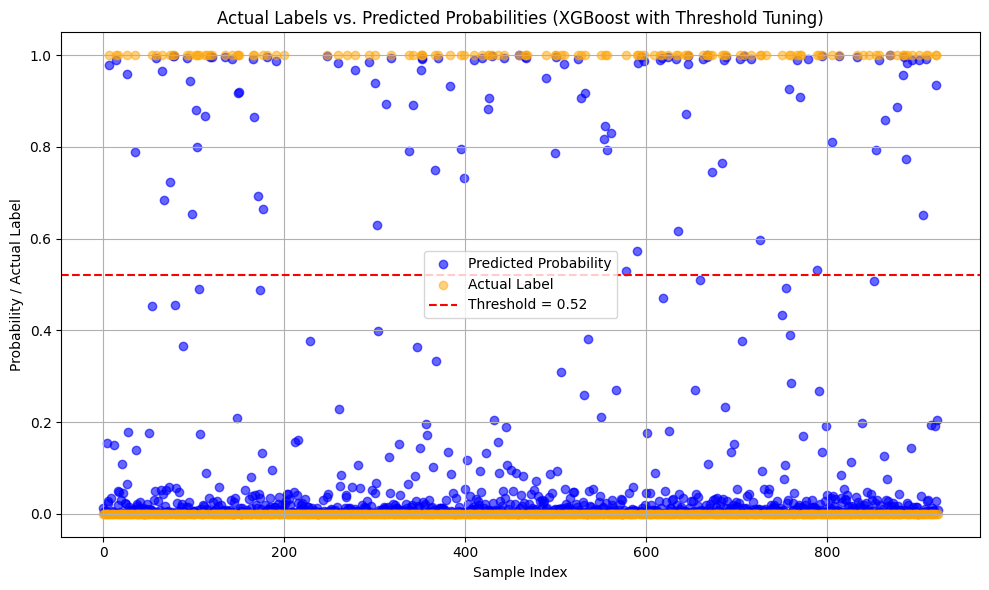

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test_probs_XG_HT, color='blue', alpha=0.6, label='Predicted Probability')
plt.scatter(range(len(y_test)), y_test, color='orange', alpha=0.5, label='Actual Label')
plt.axhline(best_threshold_XG_HT, color='red', linestyle='--', label=f'Threshold = {best_threshold_XG_HT:.2f}')
plt.xlabel("Sample Index")
plt.ylabel("Probability / Actual Label")
plt.title("Actual Labels vs. Predicted Probabilities (XGBoost with Threshold Tuning)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


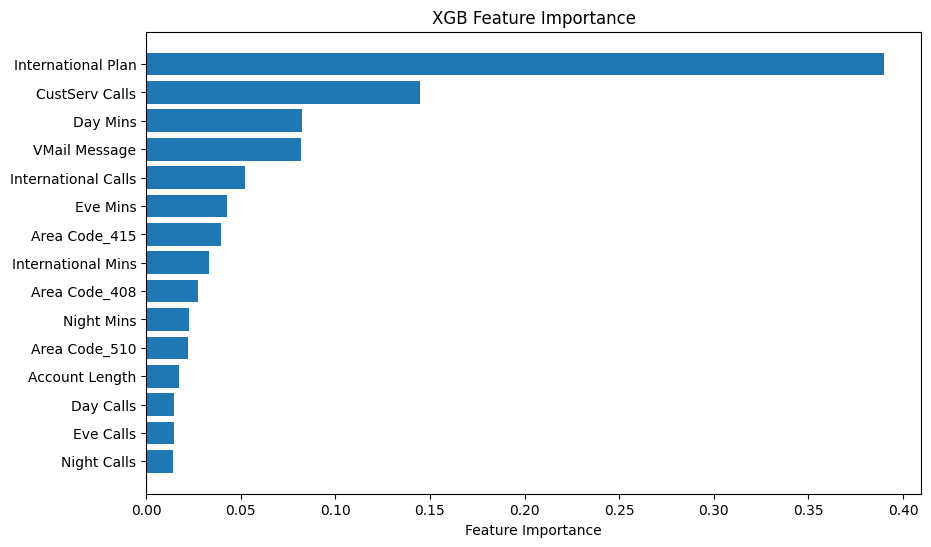

In [ ]:

importances = xgb_model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("XGB Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Project Goals

# SHAP

In [ ]:
pip install --upgrade shap


 94%|=================== | 939/1000 [00:12<00:00]       

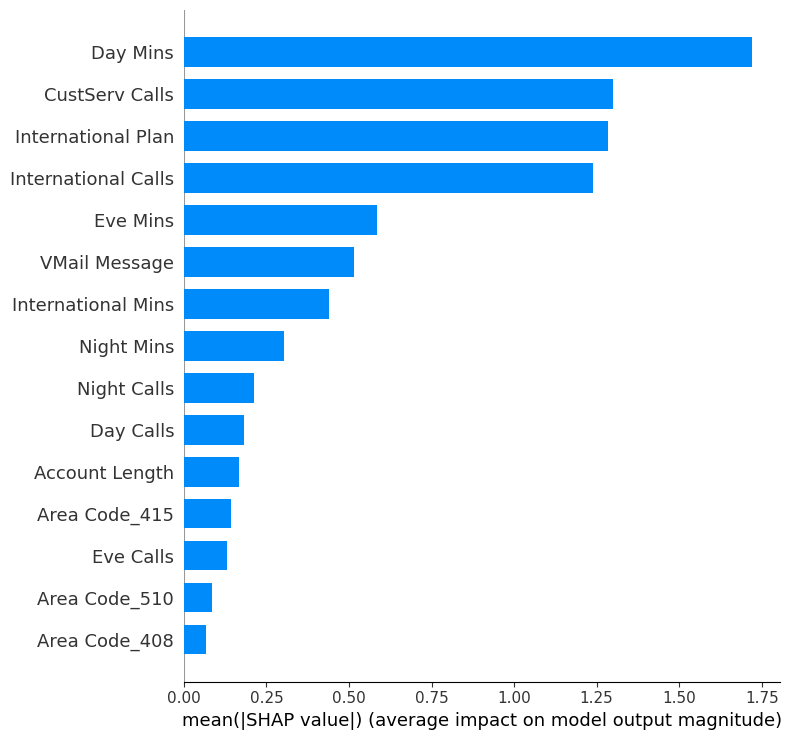

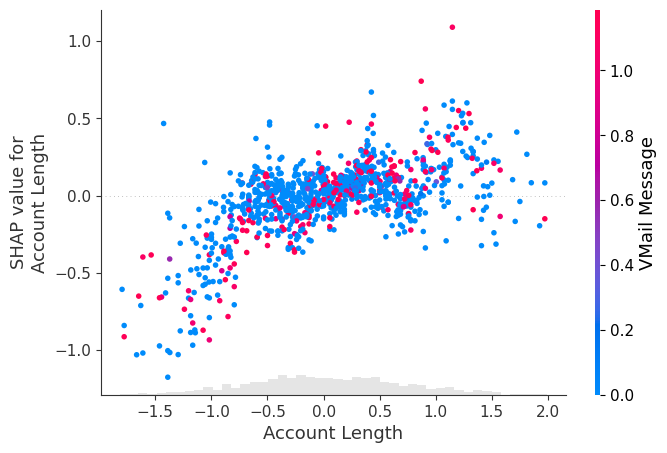

 Plotting SHAP of 'Day Mins' colored by SHAP of 'CustServ Calls'


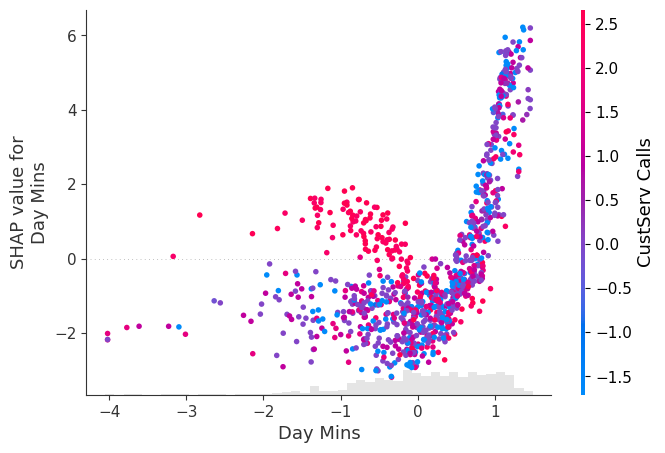

 Plotting SHAP of 'Day Mins' colored by SHAP of 'International Plan'


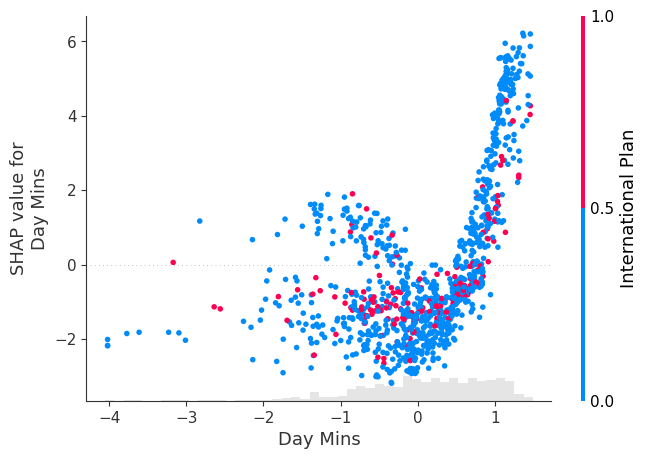

 Plotting SHAP of 'Day Mins' colored by SHAP of 'International Calls'


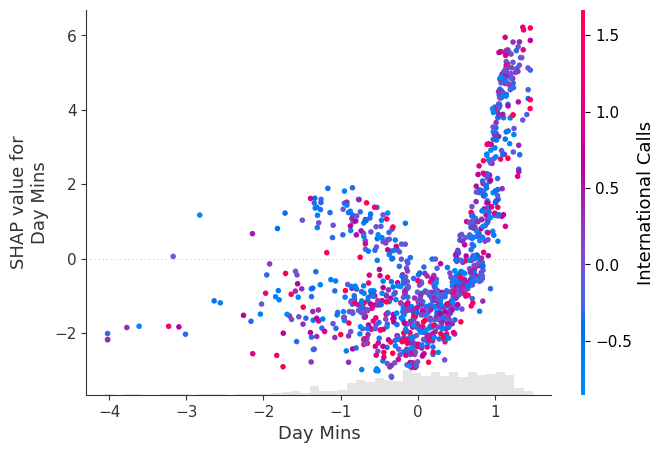

 Plotting SHAP of 'Day Mins' colored by SHAP of 'Eve Mins'


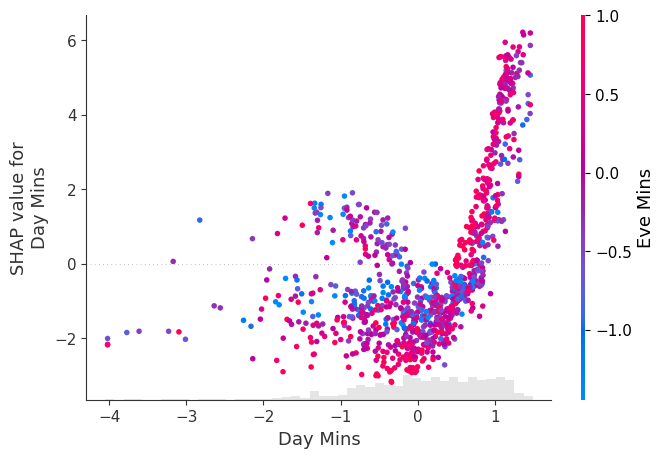

 Plotting SHAP of 'CustServ Calls' colored by SHAP of 'International Plan'


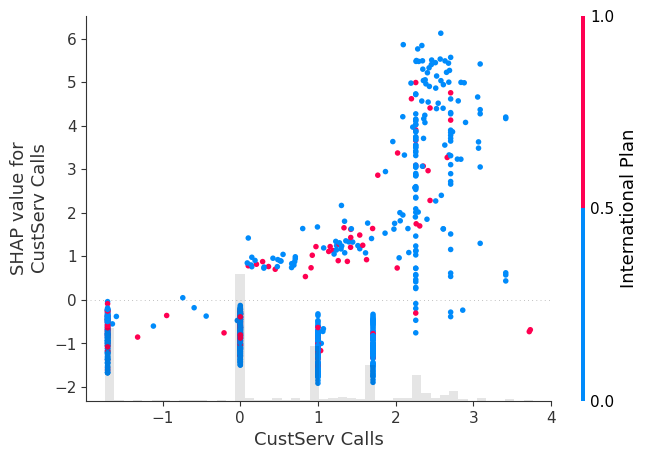

 Plotting SHAP of 'CustServ Calls' colored by SHAP of 'International Calls'


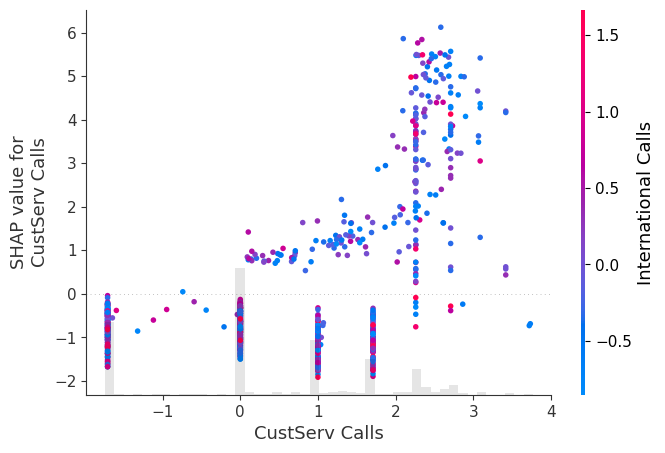

 Plotting SHAP of 'CustServ Calls' colored by SHAP of 'Eve Mins'


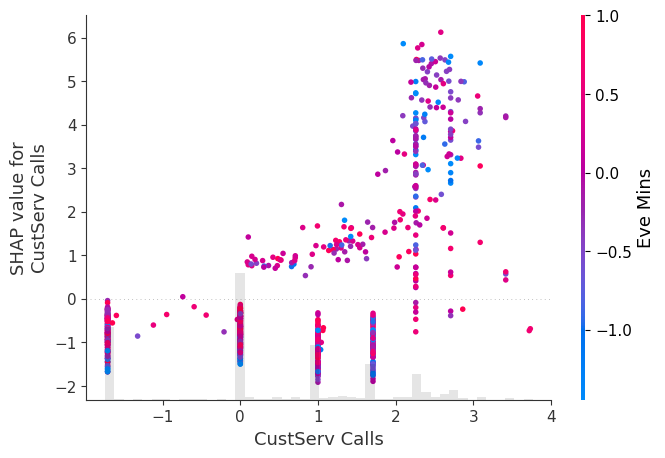

 Plotting SHAP of 'International Plan' colored by SHAP of 'International Calls'


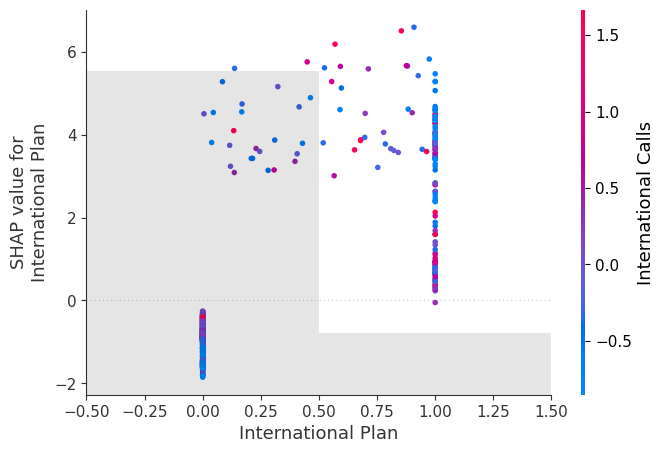

 Plotting SHAP of 'International Plan' colored by SHAP of 'Eve Mins'


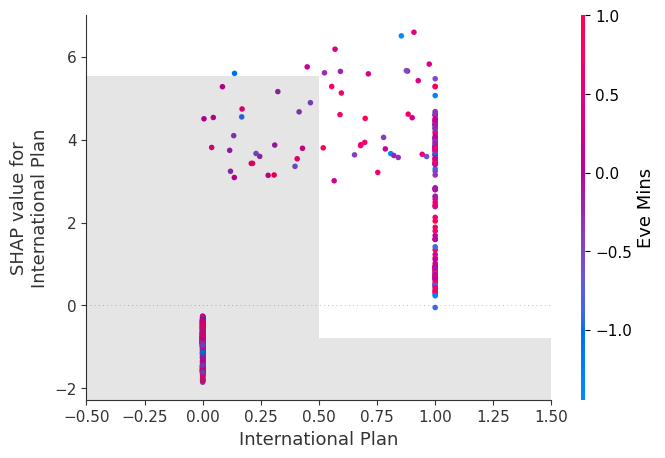

 Plotting SHAP of 'International Calls' colored by SHAP of 'Eve Mins'


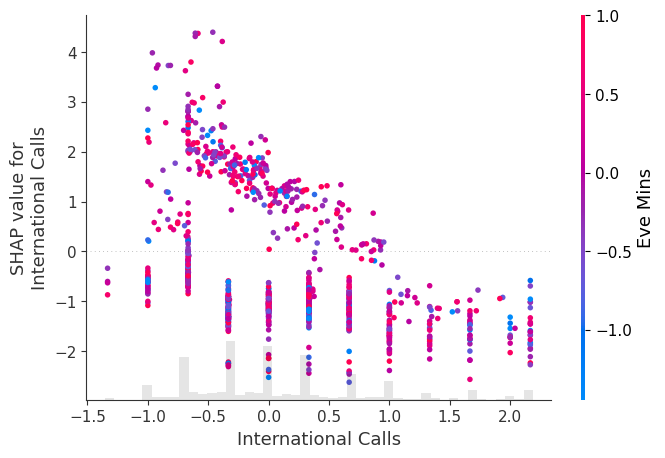

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier  # keep if needed

# Sample from the scaled SMOTE training data
sample_indices = np.random.choice(len(x_smote), size=1000, replace=False)
x_sample_scaled = x_smote[sample_indices]

# Convert to DataFrame for SHAP plots
x_sample_scaled_df = pd.DataFrame(x_sample_scaled, columns=x.columns)

# Initialize SHAP explainer with XGBoost best model
explainer = shap.Explainer(xgb_best_model, x_sample_scaled_df)

# Compute SHAP values
shap_values = explainer(x_sample_scaled_df)

# SHAP Summary Plot (global importance)
shap.summary_plot(shap_values.values, x_sample_scaled_df, plot_type="bar")

# SHAP Force Plot (individual explanation, safe for both 2D and 3D SHAP outputs)
sample_index_for_force = 5
shap.initjs()

if len(shap_values.values.shape) == 3:
    # For models like RandomForestClassifier
    base_val = shap_values.base_values[sample_index_for_force, 1]
    shap_val = shap_values.values[sample_index_for_force, :, 1]
else:
    # For models like XGBoost
    base_val = shap_values.base_values[sample_index_for_force]
    shap_val = shap_values.values[sample_index_for_force]

shap.force_plot(
    base_value=base_val,
    shap_values=shap_val,
    features=x_sample_scaled_df.iloc[sample_index_for_force],
    feature_names=x.columns
)

# SHAP Scatter Plot comparing 2 features (model-agnostic)
shap.plots.scatter(
    shap_values[:, "Account Length"],
    color=shap_values[:, "VMail Message"]
)

# Step 1: Compute mean absolute SHAP values
shap_array = shap_values.values
if len(shap_array.shape) == 3:
    # Use class 1 SHAP values
    shap_array = shap_array[:, :, 1]

shap_values_df = pd.DataFrame(np.abs(shap_array), columns=x_sample_scaled_df.columns)

# Step 2: Get top 5 features
top_features = shap_values_df.mean().sort_values(ascending=False).head(5).index.tolist()

# Step 3: SHAP scatter plots for feature pairs
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        feat_x = top_features[i]
        feat_color = top_features[j]
        print(f" Plotting SHAP of '{feat_x}' colored by SHAP of '{feat_color}'")
        shap.plots.scatter(shap_values[:, feat_x], color=shap_values[:, feat_color])












In [ ]:
# Predict churn probabilities on the scaled test set
# churn_probs = xgb.predict_proba(x_test_scaled)[:, 1] # Original line using unfitted xgb
churn_probs = xgb_best_model.predict_proba(x_test_scaled)[:, 1] # Corrected line using fitted xgb_best_model

# Save to DataFrame
results = x_test.copy()  # keep original feature values for reference
results['churn_risk_score'] = churn_probs
results['actual_churn'] = y_test.values



In [ ]:
print(results.head())


      Account Length  International Plan  VMail Message  Day Mins  Day Calls  \
2264            18.0                   0         0.0000  5.288267       97.0   
1839            70.0                   0         0.0000  5.443716      110.0   
2525            95.0                   0         0.0000  5.164786       57.0   
23             111.0                   0         0.0000  4.713127      103.0   
1831            93.0                   0         3.7612  5.032397       90.0   

      Eve Mins  Eve Calls  Night Mins  Night Calls  International Mins  \
2264  5.321545      107.0    5.313206        105.0            2.272126   
1839  4.368181       87.0    5.513832        105.0            2.653242   
2525  5.642262      118.0    5.289277         94.0            2.370244   
23    4.929425      102.0    5.250177        105.0            2.163323   
1831  5.592851      102.0    5.590614        130.0            2.509599   

      International Calls  CustServ Calls  Area Code_408  Area Code_415  \

In [ ]:
threshold = best_threshold_XG_HT  # i.e., 0.39 from your earlier code
results['CHURN_FLAG'] = (results['churn_risk_score'] >= threshold).astype(int)


In [ ]:
# Identify At-Risk Customers
print(results['CHURN_FLAG'].value_counts())


CHURN_FLAG
0    811
1    113
Name: count, dtype: int64


In [ ]:
# Inspect the Most At-Risk Customers
at_risk = results[results['CHURN_FLAG'] == 1]
print(at_risk.sort_values(by='churn_risk_score', ascending=False).head(10))



      Account Length  International Plan  VMail Message  Day Mins  Day Calls  \
2401           126.0                   1       0.000000  5.483551       87.0   
2099            71.0                   0       0.000000  5.674697      108.0   
4513           121.0                   0       0.000000  5.616044       96.0   
3656           113.0                   0       0.000000  5.762366       97.0   
721            103.0                   0       3.610918  4.479607       92.0   
605            112.0                   0       0.000000  5.791335       77.0   
1538           113.0                   0       0.000000  4.130355      111.0   
3291           119.0                   1       3.135494  5.153869      119.0   
354             64.0                   1       0.000000  5.468904       77.0   
4577           158.0                   1       0.000000  5.303305       98.0   

      Eve Mins  Eve Calls  Night Mins  Night Calls  International Mins  \
2401  5.644386       92.0    5.217649        

In [ ]:
# Export top 10 at-risk customers to CSV for sharing with marketing/support teams
at_risk.sort_values(by='churn_risk_score', ascending=False).head(10).to_csv('top_10_at_risk_customers.csv', index=False)


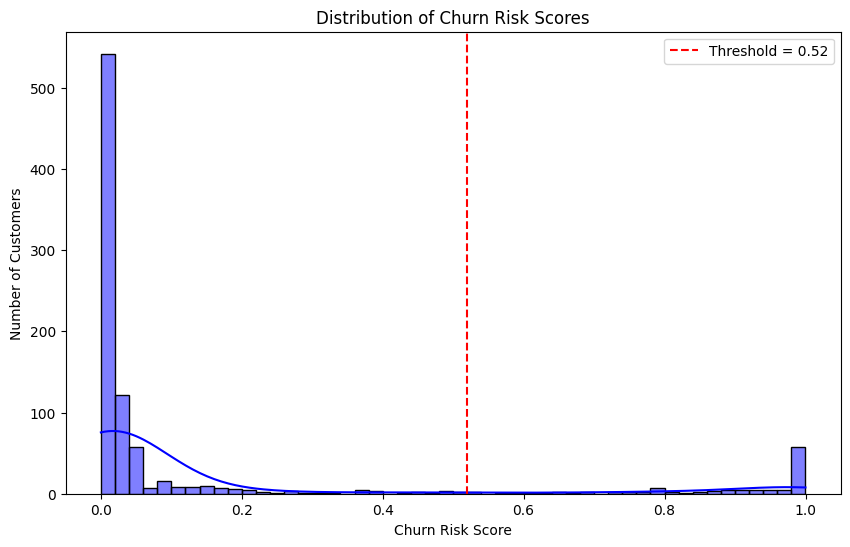

In [ ]:


plt.figure(figsize=(10,6))
sns.histplot(results['churn_risk_score'], bins=50, kde=True, color='blue')
plt.axvline(x=best_threshold_XG_HT, color='red', linestyle='--', label=f'Threshold = {best_threshold_XG_HT:.2f}')
plt.title('Distribution of Churn Risk Scores')
plt.xlabel('Churn Risk Score')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


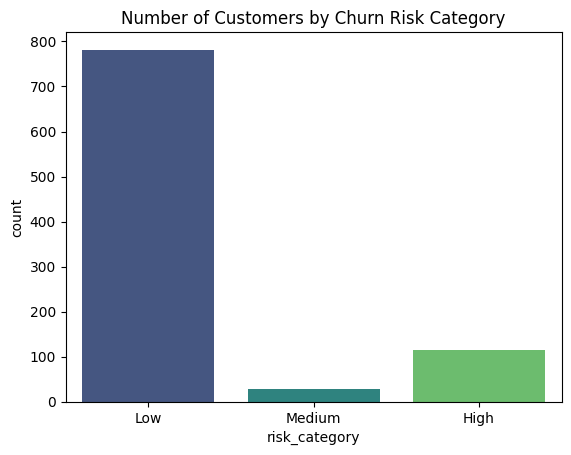

In [ ]:
results['risk_category'] = pd.cut(results['churn_risk_score'], bins=[0,0.2,0.5,1], labels=['Low', 'Medium', 'High'])

sns.countplot(x='risk_category', data=results, palette='viridis')
plt.title('Number of Customers by Churn Risk Category')
plt.show()


In [ ]:
 !pip install tabulate


In [ ]:
from tabulate import tabulate


Table = [["LR", acc_test,prec_test,recall_test,f1_test],
        ["SVM",acc_test_svc,prec_test_svc,recall_test_svc,f1_test_svc],
        ["Decision Tree", acc_test_dt,prec_test_dt,recall_test_dt,f1_test_dt],
        ["Decision Tree_HT",acc_test_dt_ht,prec_test_dt_ht,recall_test_dt_ht,f1_test_dt_ht],
        ["Random Forest", acc_test_rf,prec_test_rf,recall_test_rf,f1_test_rf],
        ["Random Forest_HT", acc_test_rf_ht,prec_test_rf_ht,recall_test_rf_ht,f1_test_rf_ht],
        ["XGBoost",acc_test_xgb,prec_test_xgb,recall_test_xgb,f1_test_xgb],
        ["XGBoost_HT", acc_test_xgb_ht,prec_test_xgb_ht,recall_test_xgb_ht,f1_test_xgb_ht],
        ]

col_names1 = ["Algorithm",  "Accuracy Score", "Precision Score", "recall Score","F1 Score"]

print(tabulate(Table, headers = col_names1, tablefmt = "fancy_grid"))







╒══════════════════╤══════════════════╤═══════════════════╤════════════════╤════════════╕
│ Algorithm        │   Accuracy Score │   Precision Score │   recall Score │   F1 Score │
╞══════════════════╪══════════════════╪═══════════════════╪════════════════╪════════════╡
│ LR               │         0.713203 │          0.286585 │          0.752 │   0.415011 │
├──────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ SVM              │         0.86039  │          0.489247 │          0.728 │   0.585209 │
├──────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ Decision Tree    │         0.918831 │          0.668919 │          0.792 │   0.725275 │
├──────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ Decision Tree_HT │         0.902597 │          0.610063 │          0.776 │   0.683099 │
├──────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ Random F

In [ ]:

Table = [["Random Forest_threshold tuned ", precision_custom,recall_custom,f1_custom],
        ["XGBoost_Threshold tuned",precision_thresh_XG_HT,recall_thresh_XG_HT,f1_thresh_XG_HT],
        ]

col_names1 = ["Algorithm", "Precision Score_Threshold", "recall Score_Threshold","F1 Score_Threshold"]

print(tabulate(Table, headers = col_names1, tablefmt = "fancy_grid"))

╒═══════════════════════════════╤═════════════════════════════╤══════════════════════════╤══════════════════════╕
│ Algorithm                     │   Precision Score_Threshold │   recall Score_Threshold │   F1 Score_Threshold │
╞═══════════════════════════════╪═════════════════════════════╪══════════════════════════╪══════════════════════╡
│ Random Forest_threshold tuned │                    0.826087 │                    0.76  │             0.791667 │
├───────────────────────────────┼─────────────────────────────┼──────────────────────────┼──────────────────────┤
│ XGBoost_Threshold tuned       │                    0.893805 │                    0.808 │             0.848739 │
╘═══════════════════════════════╧═════════════════════════════╧══════════════════════════╧══════════════════════╛


Conclusion:

On comparing all the values XGBoost performs well